####Mount Google Drive

In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Modules

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth


In [293]:
#Set Style
sns.set_style("dark");

In [294]:
#ignore warnings
warnings.filterwarnings('ignore')

In [295]:
#Import Data
dataset=pd.read_csv('/content/drive/MyDrive/Country-data.csv')
dataset

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

####Performing Initial Data Visualization

In [296]:
#overall lookout of the data
dataset.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [297]:
#information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [298]:
#description of the dataset
print(dataset.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

#### Data Preprocessing

##### Missing Values

In [299]:
#check for missing values
print("Percentage of missing values:")
print(((dataset.isna().sum())/dataset.shape[0])*100)

Percentage of missing values:
country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


##### Data Visualization 

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f1360788a60>
Traceback (most recent call last):
  File "/usr/lib/python3.9/weakref.py", line 54, in _cb
    def _cb(arg):
KeyboardInterrupt: 


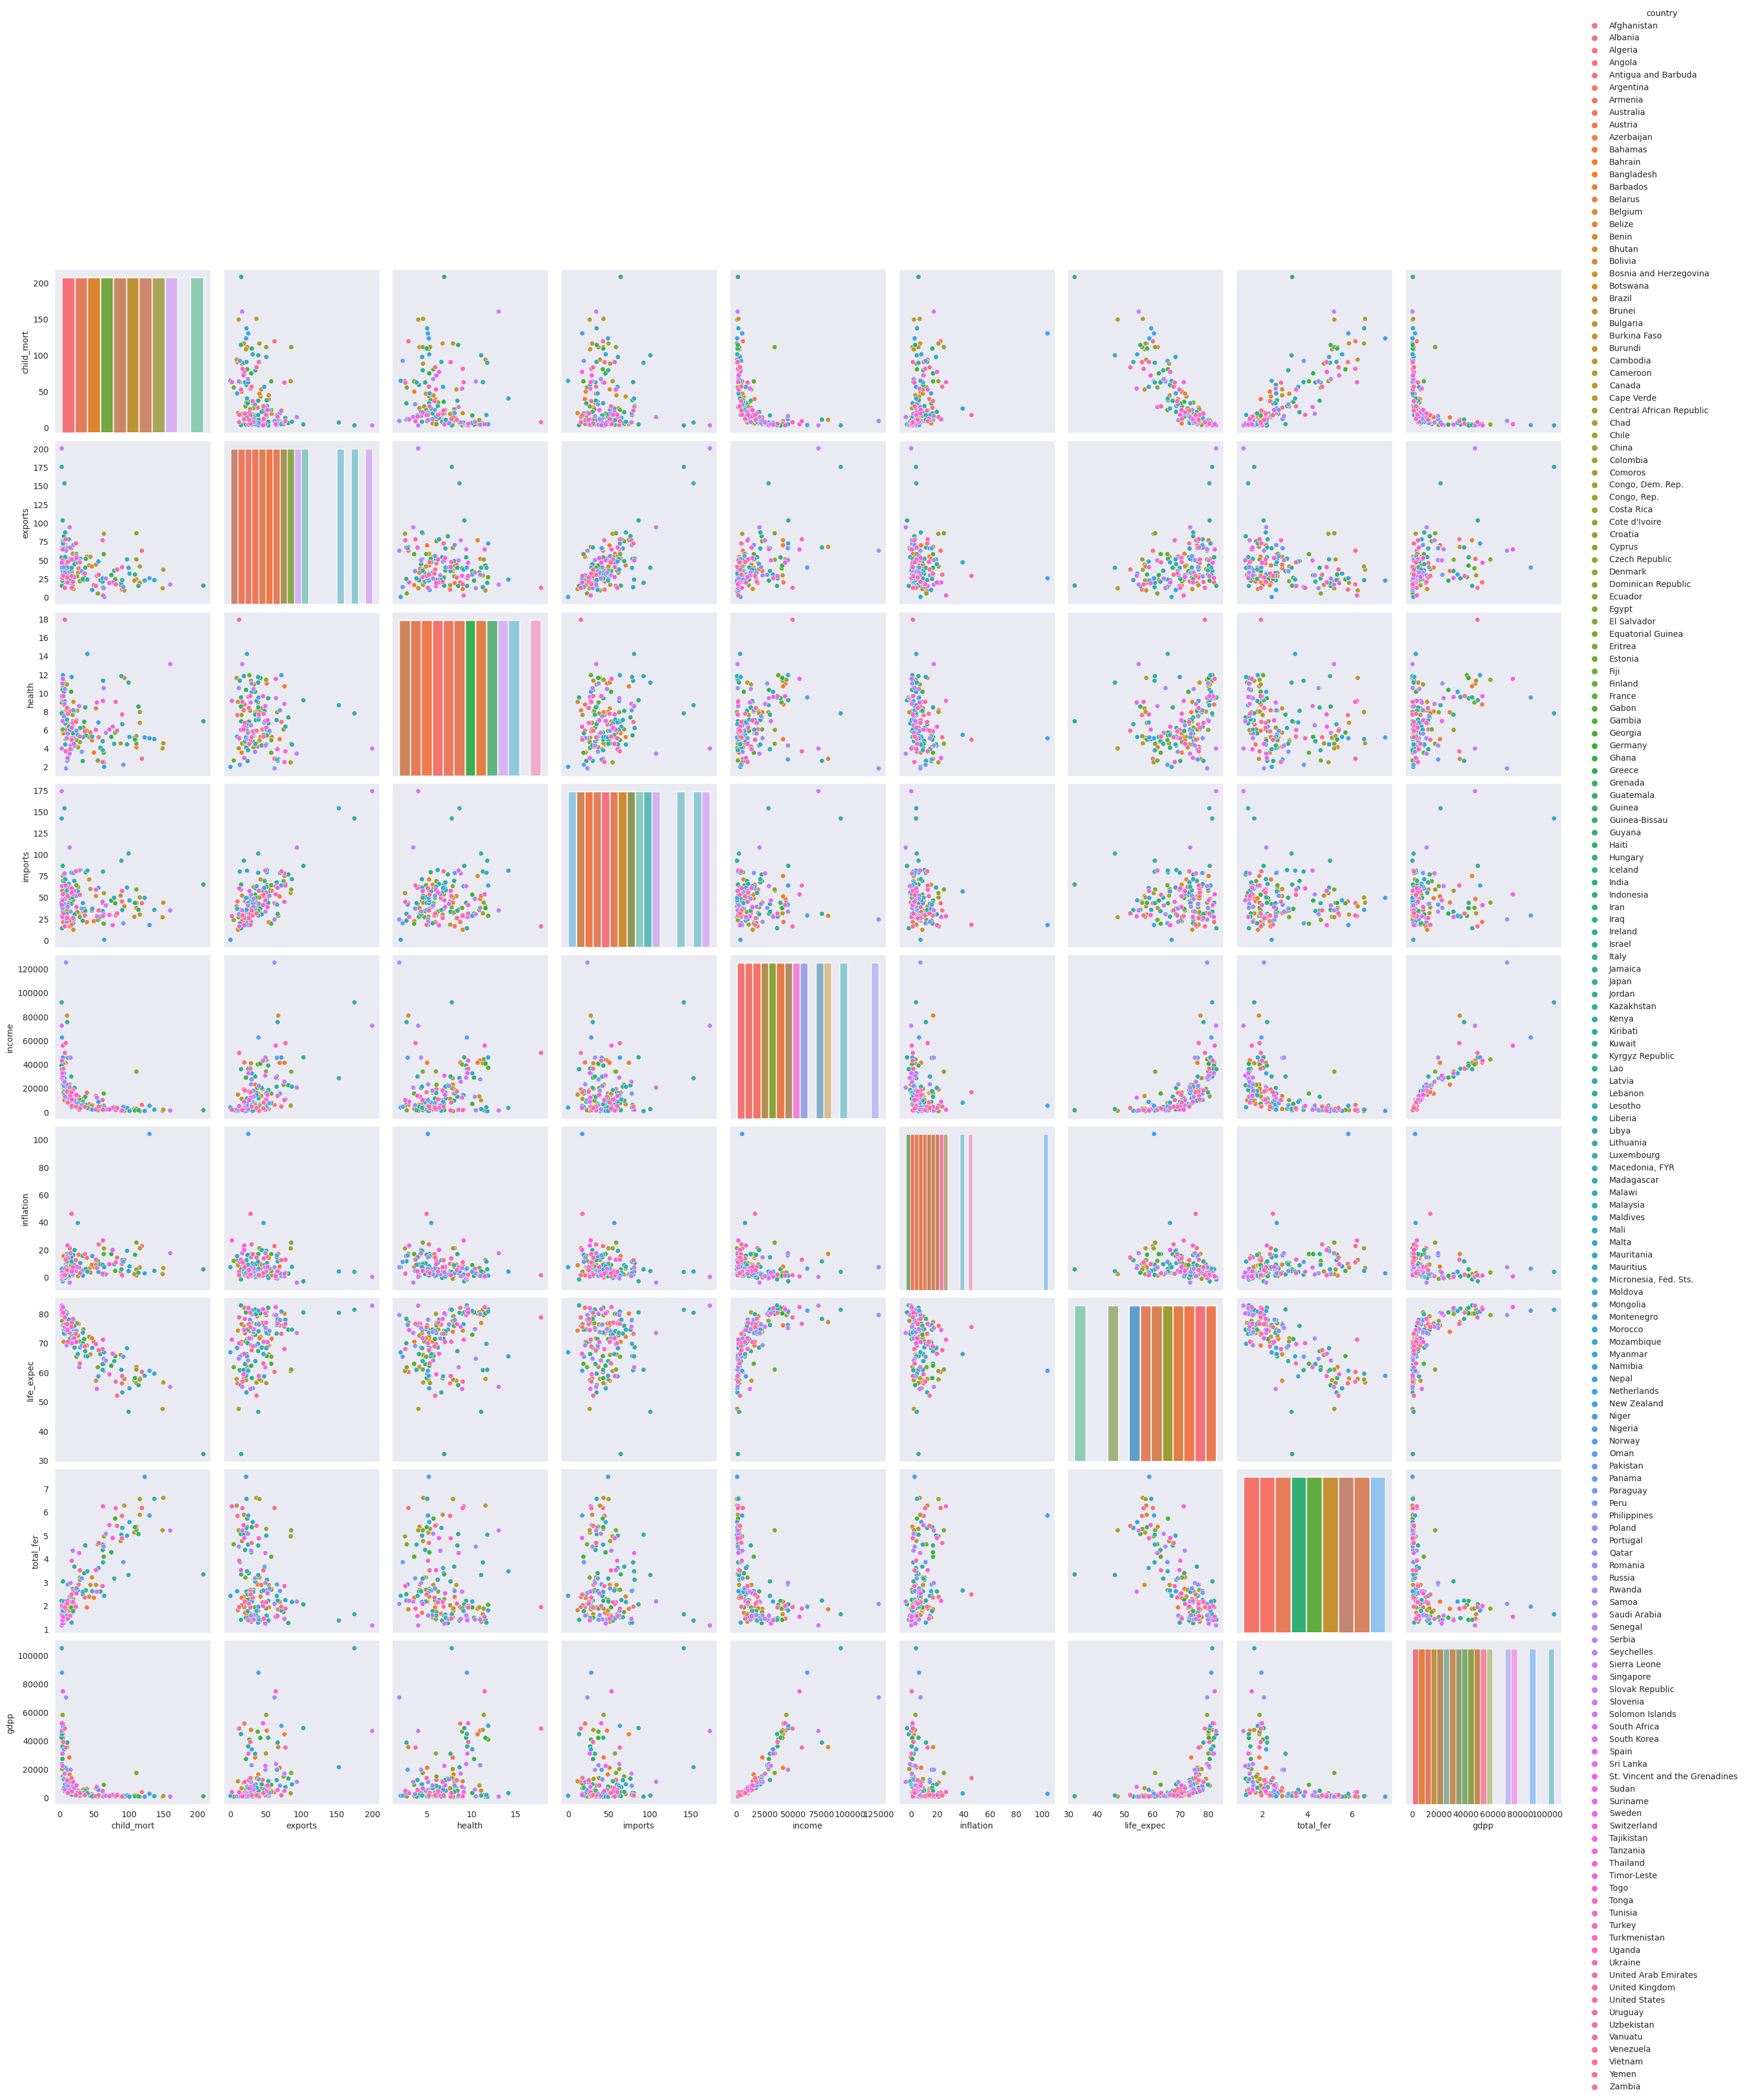

In [300]:
#Plots for visualiazing the datset
sns.pairplot(dataset, hue="country", size=3,diag_kind="hist");
plt.show()


Plot density v/s feature child_mort



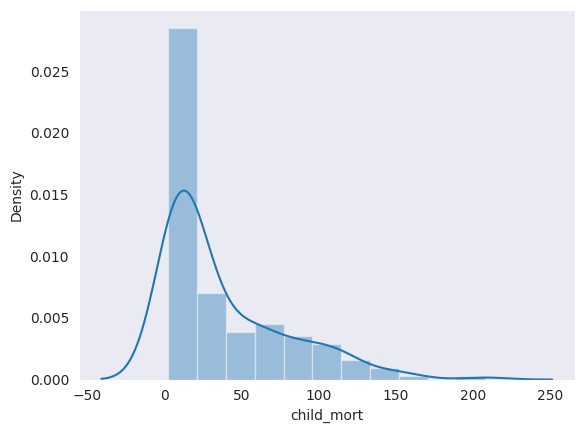


Plot density v/s feature exports



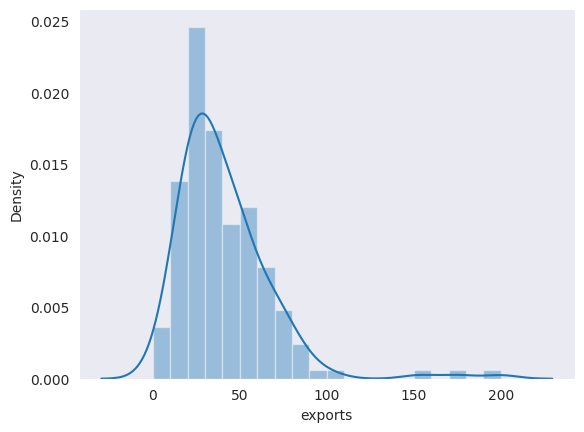


Plot density v/s feature health



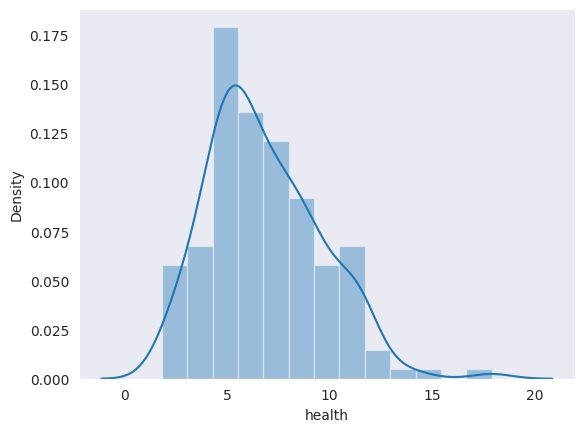


Plot density v/s feature imports



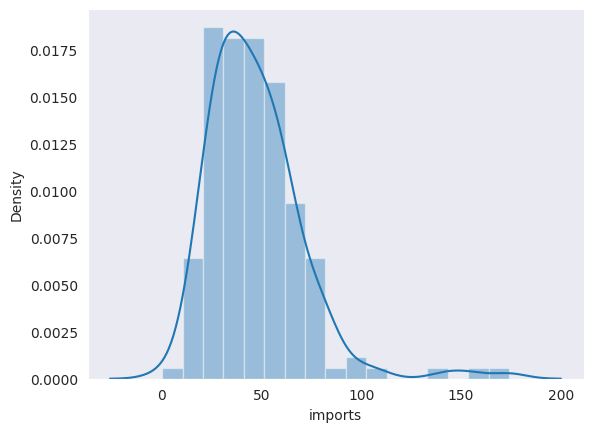


Plot density v/s feature income



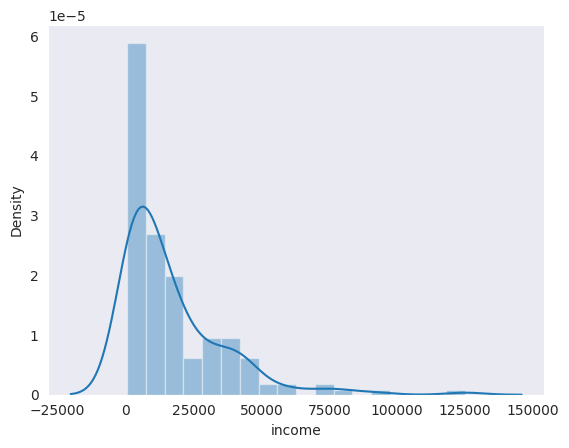


Plot density v/s feature inflation



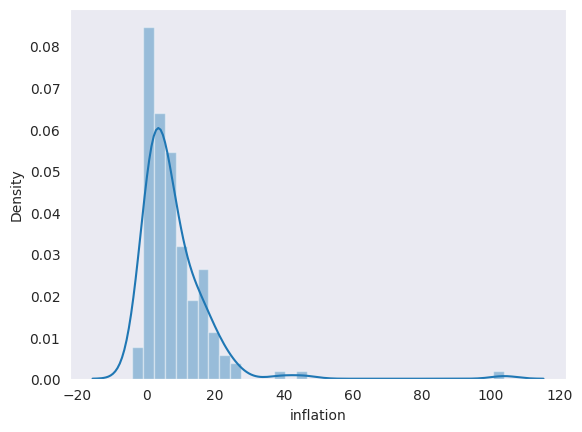


Plot density v/s feature life_expec



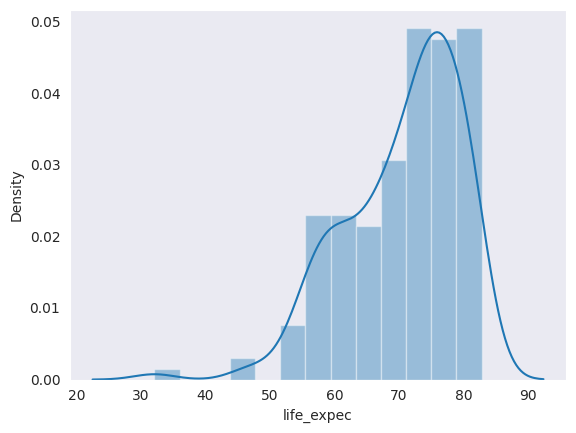


Plot density v/s feature total_fer



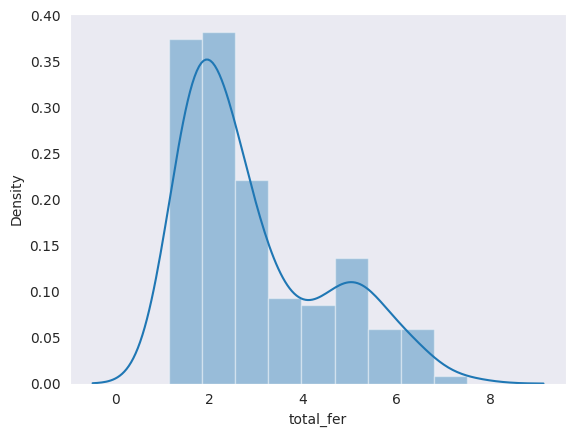


Plot density v/s feature gdpp



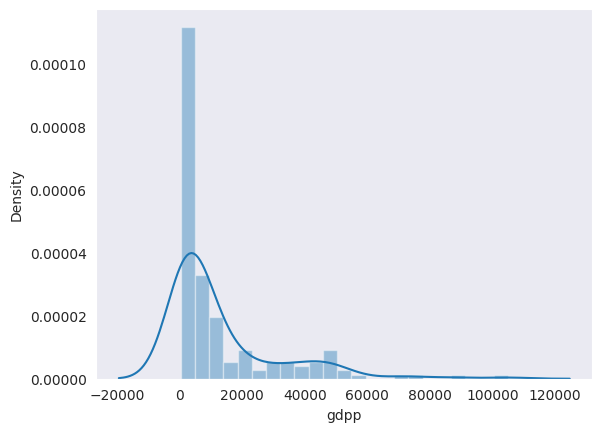

In [301]:
#Plotting distributions of the attributes
data = dataset.drop('country',axis = 1)
for i in data.columns:
  print(f"\nPlot density v/s feature {i}\n")
  sns.distplot(data[i])
  plt.show()

In [302]:
#Separting Continous and categorical features
categorical_data=['country']
continuous_data=['child_mort','exports','health','imports','income','inflation','gdpp','total_fer','life_expec']
print(categorical_data)
print(continuous_data)

['country']
['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'gdpp', 'total_fer', 'life_expec']


In [303]:
#Function for classify country into three types low ,median and high feature value
def classifier(data,X,Y):
  df_sorted = data.sort_values(Y, ascending=True)
  length = len(dataset)
  a = int((length + 1)/2)
  plt.figure(figsize=(8, 6))
  plt.title('Countries with low ' + Y)
  sns.barplot(x = X,y = Y, data = df_sorted[:7],palette = 'Paired',edgecolor = 'black')
  plt.show()
  plt.figure(figsize=(8, 6))
  plt.title('Countries with Median ' + Y)
  sns.barplot(x = X,y = Y, data = df_sorted[a-3:a+3],palette = 'Paired',edgecolor = 'black')
  plt.show()
  plt.figure(figsize=(8, 6))
  plt.title('Countries with High ' + Y)
  sns.barplot(x = X,y = Y, data = df_sorted[-6:],palette = 'Paired',edgecolor = 'black')
  plt.show()

Visualize the feature classify into three types high,median and low based on the feature value

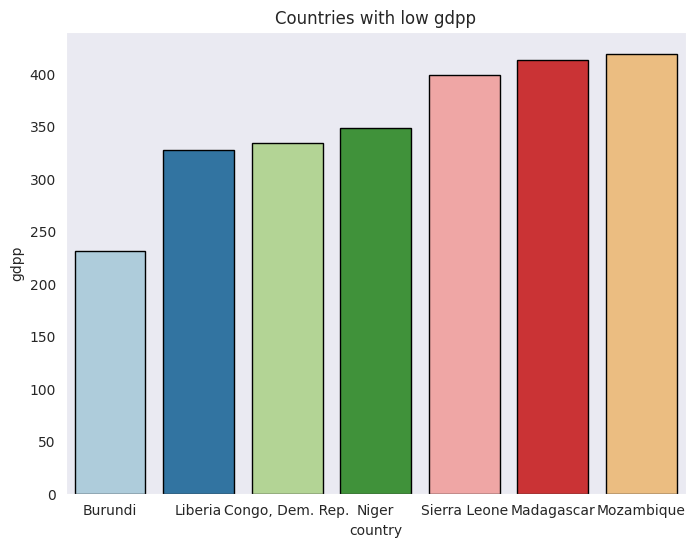

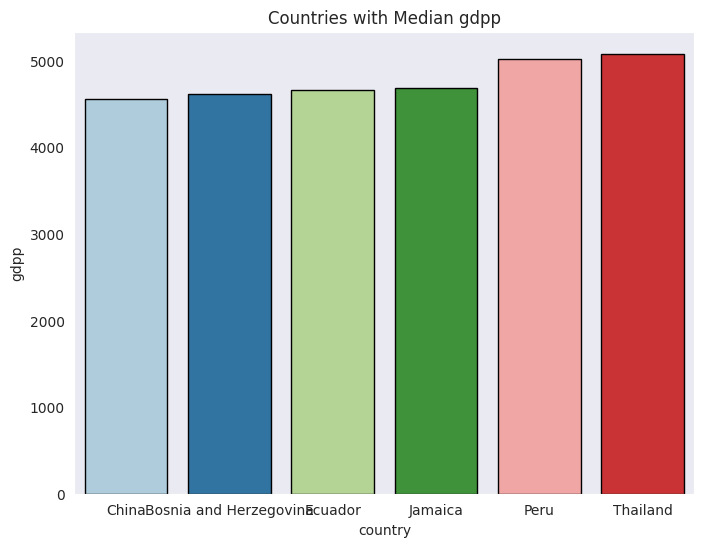

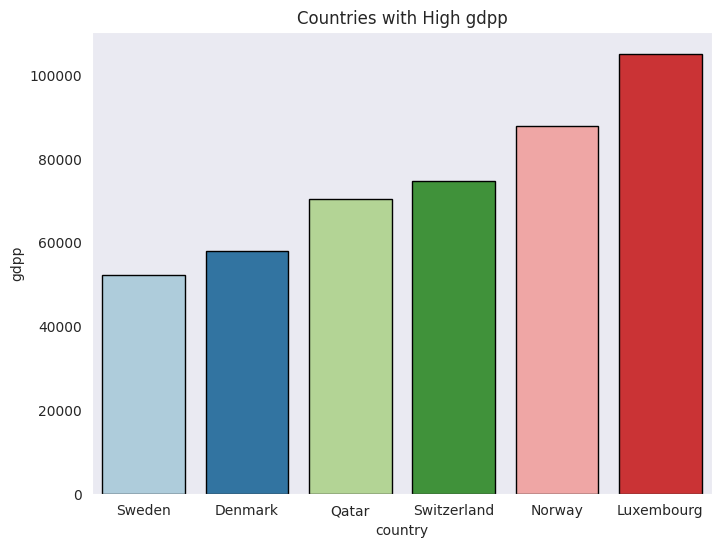

In [304]:
classifier(dataset,'country','gdpp')

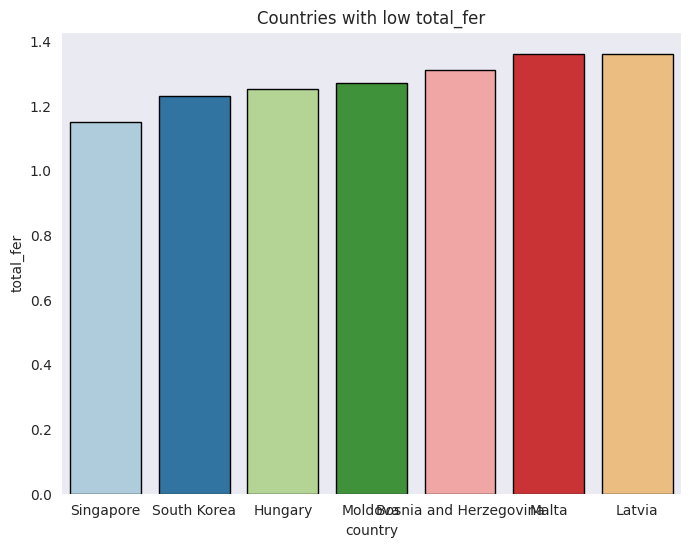

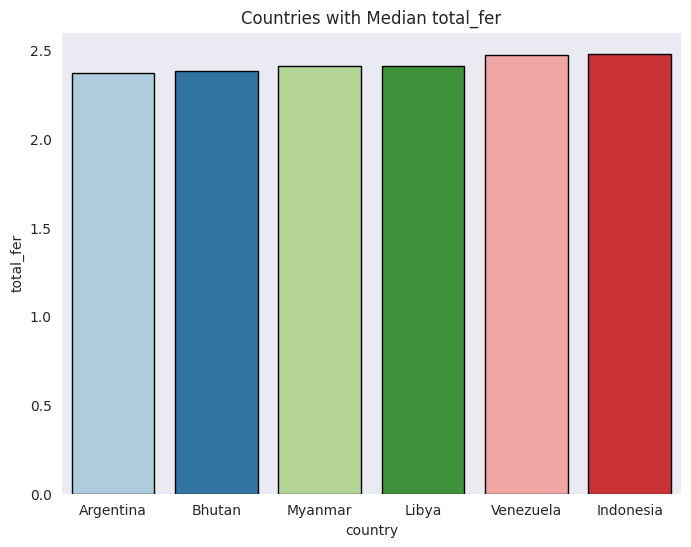

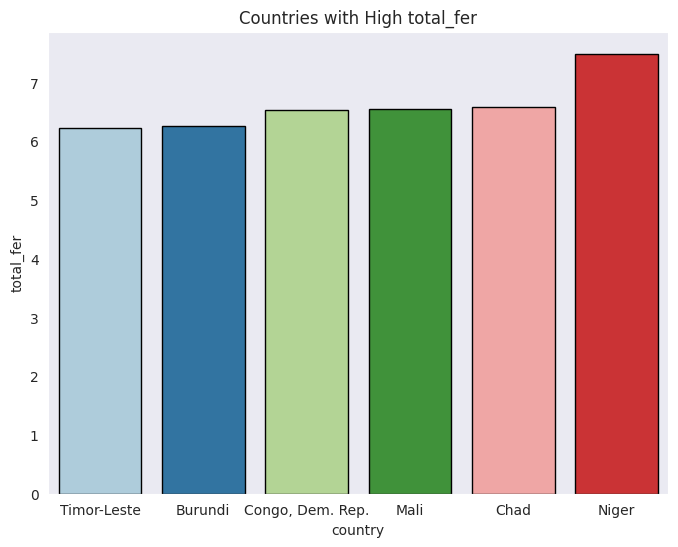

In [305]:
classifier(dataset,'country','total_fer')

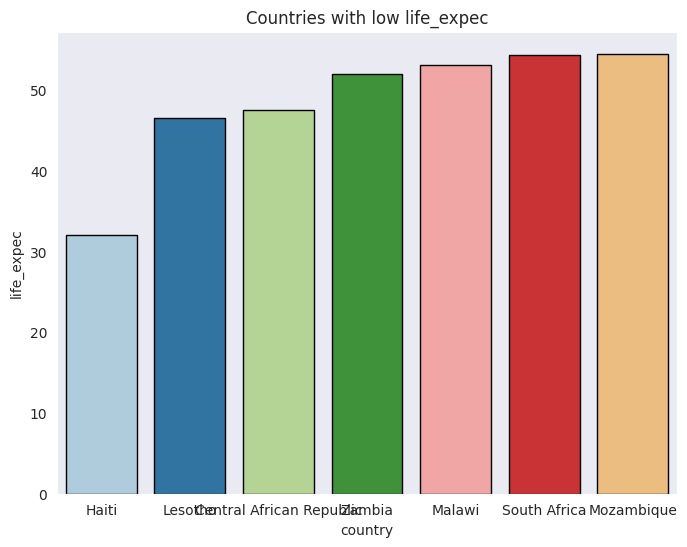

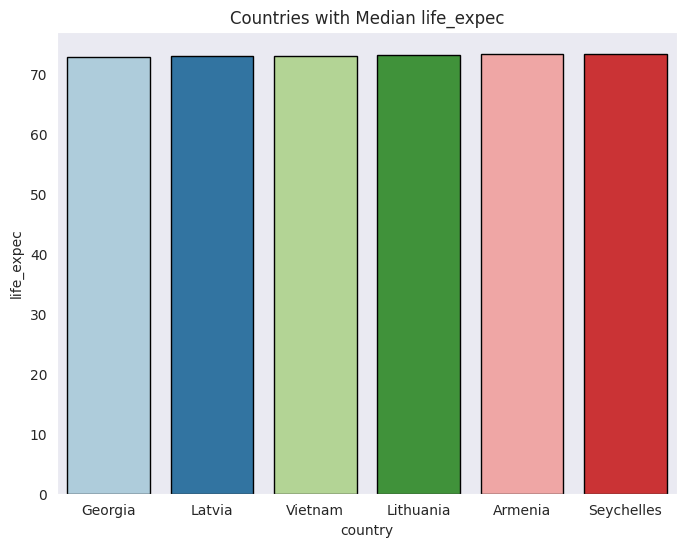

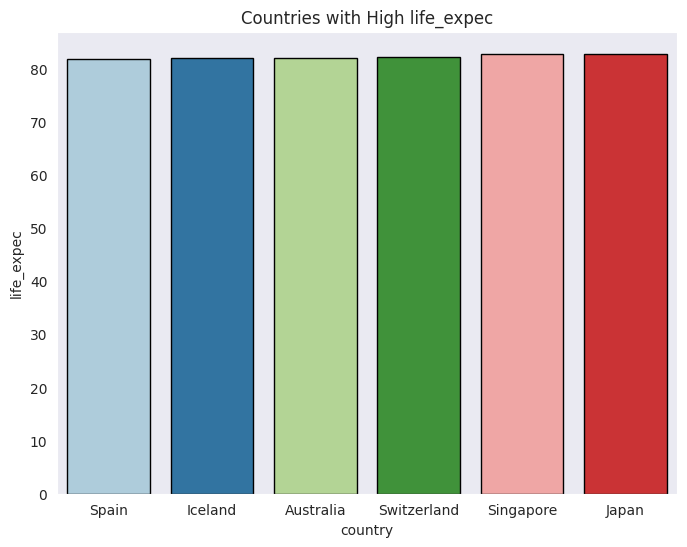

In [306]:
classifier(dataset,'country','life_expec')

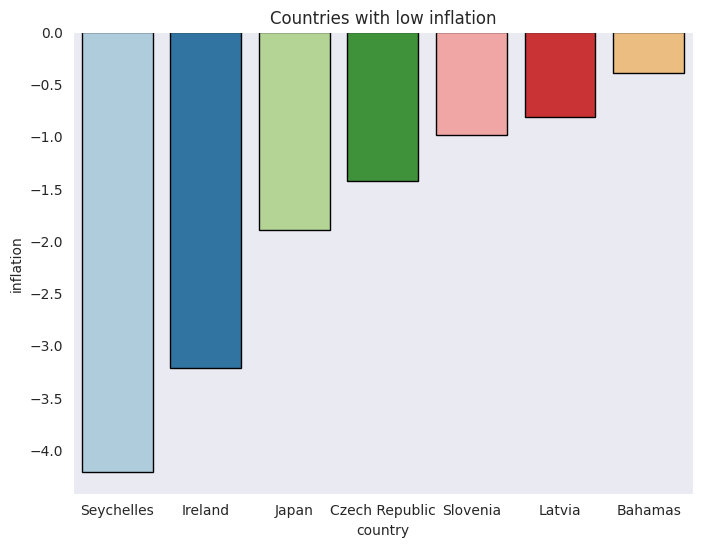

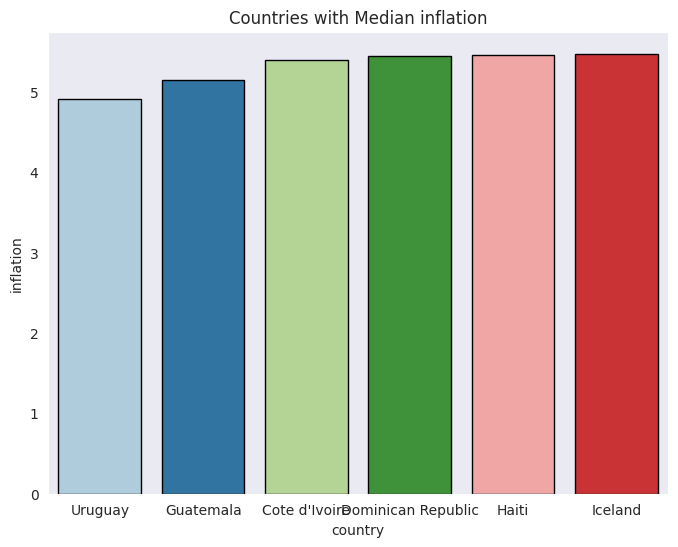

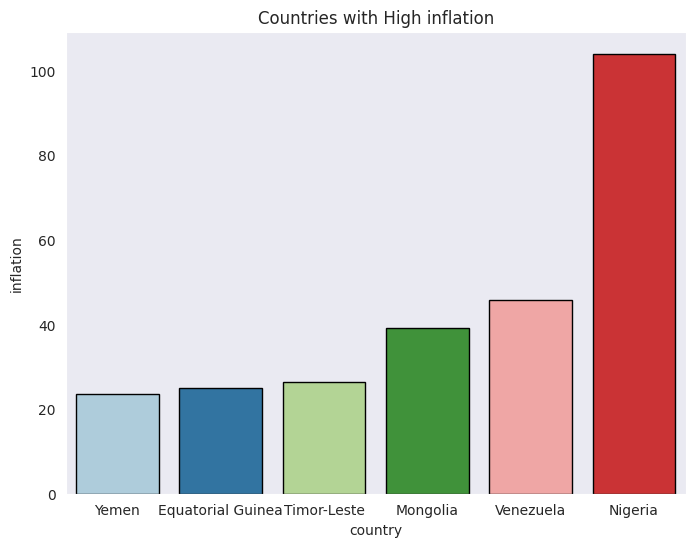

In [307]:
classifier(dataset,'country','inflation')

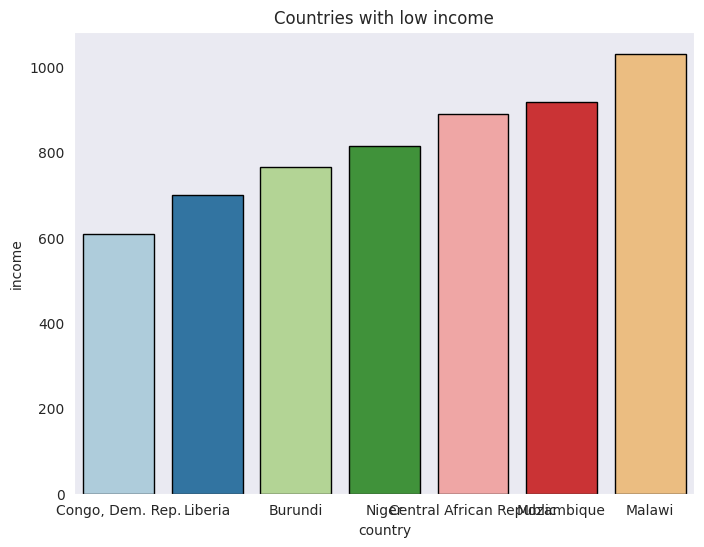

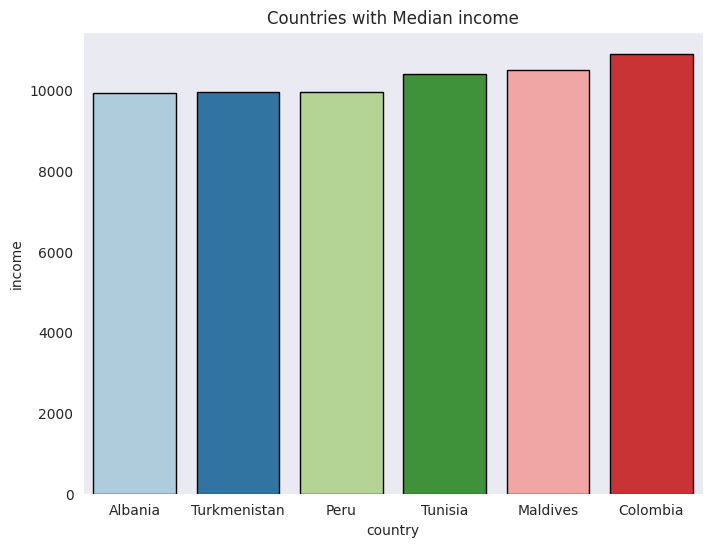

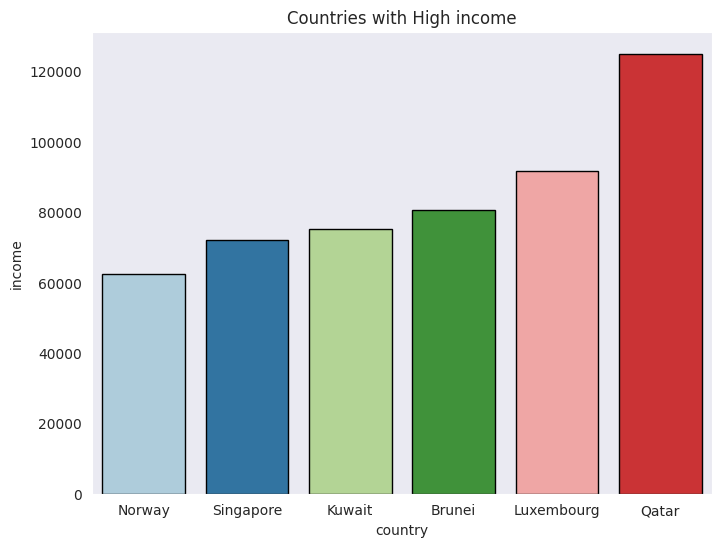

In [308]:
classifier(dataset,'country','income')

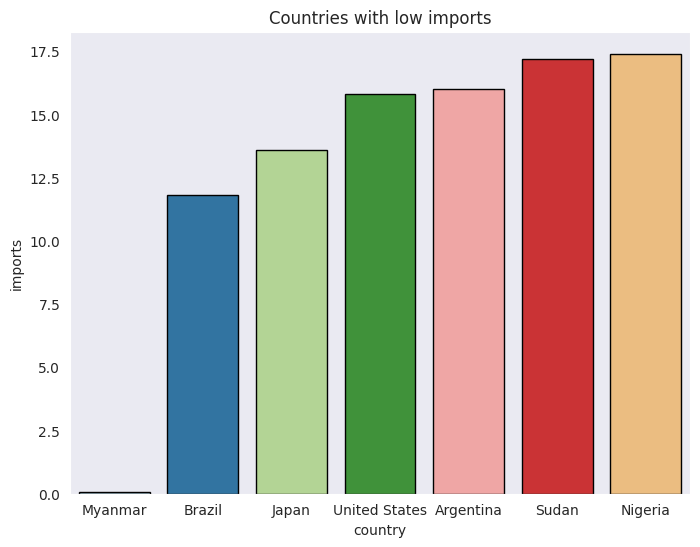

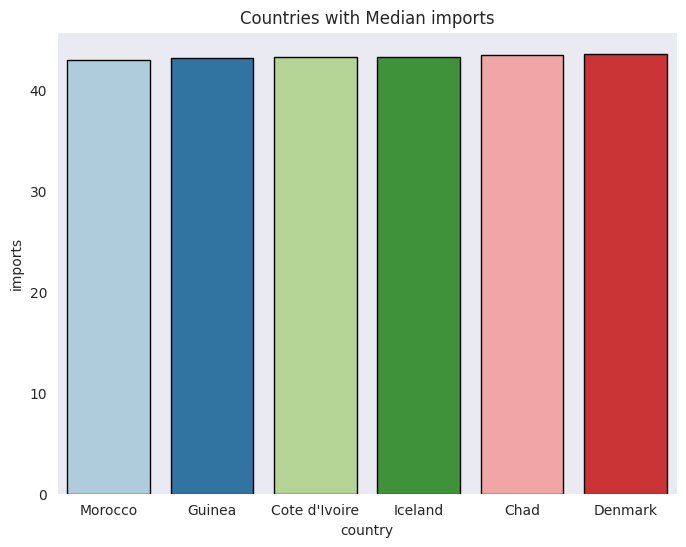

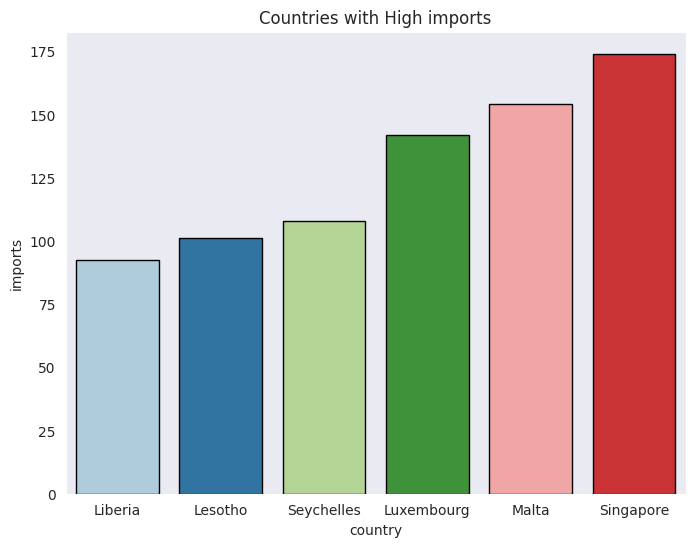

In [309]:
classifier(dataset,'country','imports')

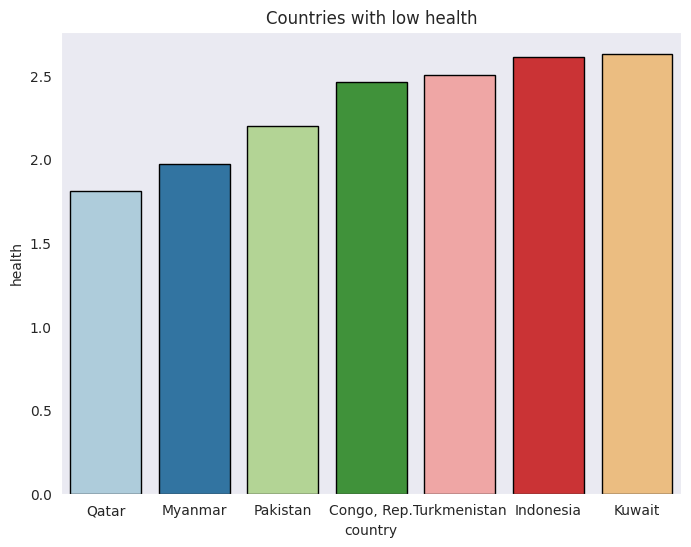

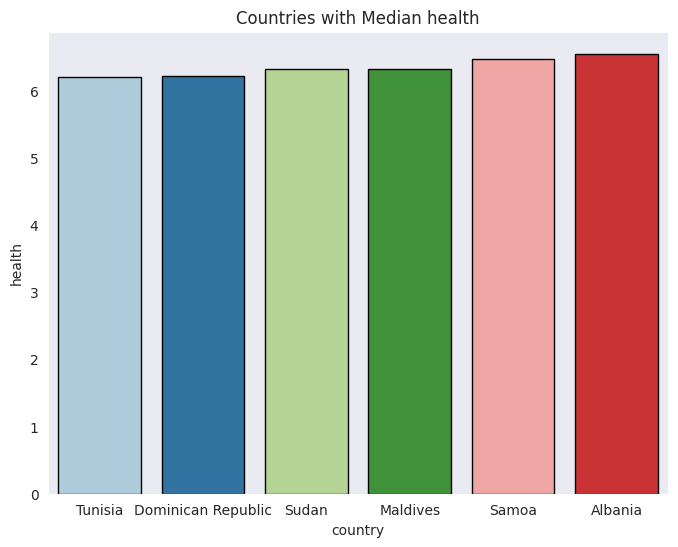

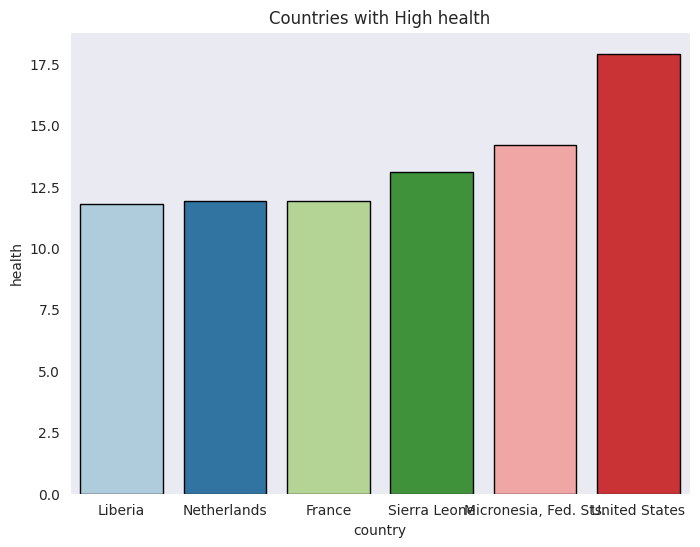

In [310]:
classifier(dataset,'country','health')

In [311]:
#Calculating Correleation matrix
dataset.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

<Axes: >

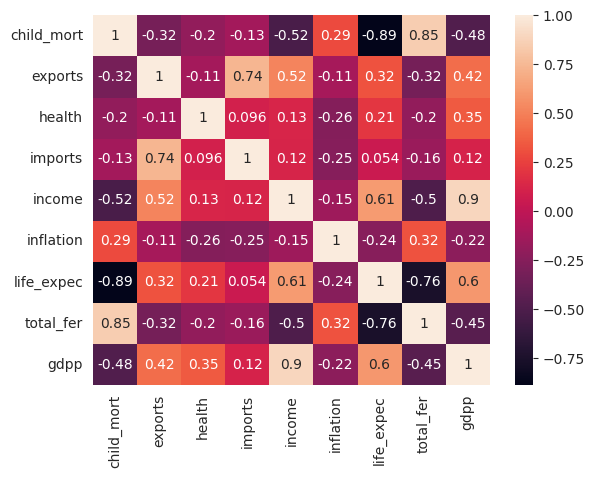

In [312]:
#Heatmap for the dataset
sns.heatmap(dataset.corr(),annot = True)

#####Data Standardization 

In [313]:
#Standardization of all the continuous features
scaler = StandardScaler()
dataset[continuous_data] = scaler.fit_transform(dataset[continuous_data])

# PCA (from scratch)

In [420]:
#Function to Centralize the Data
def centralize(data):
  mean = data.mean(axis =0)
  std= data.std(axis=0)
  data_cen = (data-mean)/std
  return data_cen

data_cen = centralize(dataset[continuous_data])

In [421]:
#function to compute covariance matrix from scratch
def covar(data):
  data_val = data.values
  N, M = data_val.shape
  cov = np.zeros((M, M))
  for i in range(M):
    for j in range(M):
      cov[i, j] = np.sum((data_val[:, j]) * (data_val[:, i]))/(N-1)
  return cov
cov=covar(data_cen)
print('covariance matrix for standardized data\n', cov)

covariance matrix for standardized data
 [[ 1.         -0.31809322 -0.20040206 -0.12721092 -0.52431502  0.28827617
  -0.48303217  0.84847811 -0.8866761 ]
 [-0.31809322  1.         -0.1144084   0.73738083  0.5167836  -0.10729439
   0.41872475 -0.32001055  0.3163126 ]
 [-0.20040206 -0.1144084   1.          0.09571668  0.12957861 -0.25537579
   0.34596553 -0.19667399  0.21069212]
 [-0.12721092  0.73738083  0.09571668  1.          0.12240625 -0.24699428
   0.11549817 -0.15904843  0.05439053]
 [-0.52431502  0.5167836   0.12957861  0.12240625  1.         -0.147756
   0.89557143 -0.50184005  0.61196247]
 [ 0.28827617 -0.10729439 -0.25537579 -0.24699428 -0.147756    1.
  -0.22163106  0.31692107 -0.23970496]
 [-0.48303217  0.41872475  0.34596553  0.11549817  0.89557143 -0.22163106
   1.         -0.45491027  0.60008913]
 [ 0.84847811 -0.32001055 -0.19667399 -0.15904843 -0.50184005  0.31692107
  -0.45491027  1.         -0.76087469]
 [-0.8866761   0.3163126   0.21069212  0.05439053  0.61196247 -0.

In [422]:
#Calculating eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov)
print('Eigenvectors are\n', eig_vecs)
print('\nEigenvalues corresponding to eigen vectors are\n', eig_vals)

Eigenvectors are
 [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
   0.3275418  -0.68274306 -0.07948854]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
  -0.12308207 -0.01419742 -0.70730269]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
   0.11308797  0.07249683 -0.24983051]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
   0.09903717 -0.02894642  0.59218953]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
   0.61298247  0.35262369  0.09556237]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
  -0.02523614 -0.01153775  0.10463252]
 [-0.39264482  0.0460224  -0.12297749 -0.53199457 -0.18016662 -0.01677876
  -0.62564572 -0.24969636  0.24299776]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.75068875
  -0.02633585  0.29335267  0.02882643]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
   0

In [423]:
#finding eigenvalues in decreasing order for non-standarized data
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order for non-standardized data:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order for non-standardized data:

4.1356565807486305
1.5463463086456386
1.1703833007257751
0.9947845625014721
0.660619028174043
0.22358112087849716
0.11343873583485228
0.088315356413354
0.06687500607773555


In [424]:
#Calculating variance expressed by each component
#Calculating Cumulative variance 
var_exp = [(i / sum(eig_vals))*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance expressed by each component is \n",var_exp)
print("Cumulative variance expressed as we travel each component")
for i in range(8):
    print('Eigenvectors upto',i+1, 'expresses',cum_var_exp[i], '% variance')

Variance expressed by each component is 
 [45.9517397860959, 17.18162565161821, 13.004258896953058, 11.053161805571914, 7.340211424156036, 2.4842346764277465, 1.2604303981650256, 0.9812817379261558, 0.7430556230859507]
Cumulative variance expressed as we travel each component
Eigenvectors upto 1 expresses 45.9517397860959 % variance
Eigenvectors upto 2 expresses 63.133365437714104 % variance
Eigenvectors upto 3 expresses 76.13762433466717 % variance
Eigenvectors upto 4 expresses 87.19078614023908 % variance
Eigenvectors upto 5 expresses 94.53099756439512 % variance
Eigenvectors upto 6 expresses 97.01523224082287 % variance
Eigenvectors upto 7 expresses 98.2756626389879 % variance
Eigenvectors upto 8 expresses 99.25694437691405 % variance


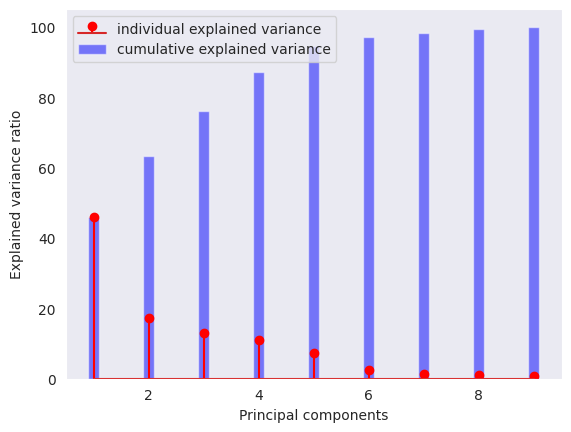

In [425]:
#Plotting Explained variance ratio and principal components
def plotting(eig_pairs):
    fig, ax = plt.subplots()
    ax.stem(range(1,10), var_exp, linefmt='r-', markerfmt='ro', label='individual explained variance')
    ax.bar(range(1,10), cum_var_exp,width = 0.2, color='b',alpha=0.5, label='cumulative explained variance')
    ax.set_ylabel('Explained variance ratio')
    ax.set_xlabel('Principal components')
    ax.legend()
    plt.show()

plotting(eigen_pairs)

In [426]:
# top 6 eigenvectors explain upto 97% variance so we will take only the top 6 eigen vectors for transformation
# we get 6 features in our updated data with pca
W=np.hstack((eigen_pairs[0][1][:, ].reshape(data_cen.shape[1],1),
             eigen_pairs[1][1][:, ].reshape(data_cen.shape[1],1),
             eigen_pairs[2][1][:, ].reshape(data_cen.shape[1],1),
             eigen_pairs[3][1][:, ].reshape(data_cen.shape[1],1),
             eigen_pairs[4][1][:, ].reshape(data_cen.shape[1],1),
             eigen_pairs[5][1][:, ].reshape(data_cen.shape[1],1))).real

data_pca = data_cen.dot(W)
data_pca

0         1         2         3         4         5
0    2.904290 -0.095334  0.715965 -1.002240 -0.157835  0.253834
1   -0.428622  0.586392  0.332486  1.157577  0.174154 -0.084325
2    0.284370  0.453810 -1.217842  0.865511  0.156005  0.400491
3    2.923630 -1.690471 -1.520471 -0.837107 -0.272390  0.546353
4   -1.030477 -0.136249  0.225044  0.844523 -0.192428  0.206298
..        ...       ...       ...       ...       ...       ...
162  0.818170 -0.637652  0.388754  0.704477 -0.394561 -0.009032
163  0.549383  1.230186 -3.092051  0.114965  2.076336 -0.096982
164 -0.497030 -1.386574  0.237811  1.070877  1.172554 -0.051452
165  1.881792  0.109125 -1.106424 -0.056088  0.616511  0.539295
166  2.855476 -0.484541 -0.222497 -0.813916 -0.273246 -0.200774

[167 rows x 6 columns]

#KMeans

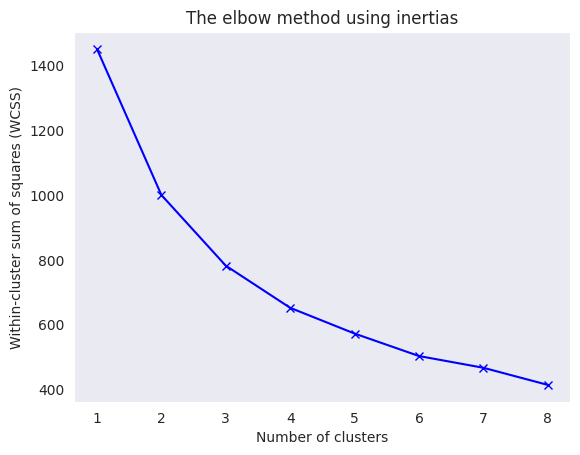

In [427]:
#using elbow method to find optimal number of clusters
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss, 'bx-')
plt.title('The elbow method using inertias')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.show()  

Silhouette Score for number of clusters = 2 is 0.2963736460252068
Silhouette Score for number of clusters = 3 is 0.2979646241895132
Silhouette Score for number of clusters = 4 is 0.31536252220069494
Silhouette Score for number of clusters = 5 is 0.23780697630764566
Silhouette Score for number of clusters = 6 is 0.2487290968458941
Silhouette Score for number of clusters = 7 is 0.25736309632727905
Silhouette Score for number of clusters = 8 is 0.2350174492758589
the optimul value of clusters is 4


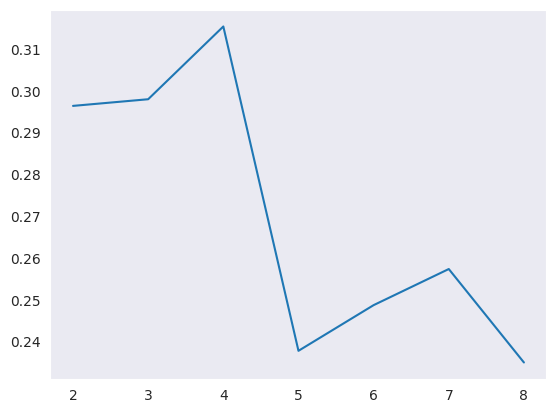

In [428]:
#Calculate  Silhouette Score
max_score=0
list=[i for i in range(2, 9)]
silhouette=[]
for i in range(2, 9):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, kmeans.labels_, metric='euclidean')
    if score>max_score:
      clust=i
      max_score=score
    silhouette.append(score)
    print("Silhouette Score for number of clusters =", i , "is", score)

print("the optimul value of clusters is", clust)
plt.plot(list, silhouette)
plt.show() 

In [429]:
#Apply Kmeans for number of clusters =4
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(data_pca)

In [430]:
#finding the predicted class labels
print("Predicted Class labels :- ")
print(kmeans.labels_)

Predicted Class labels :- 
[1 3 3 1 3 3 3 2 2 3 3 3 3 3 3 2 3 1 3 3 3 1 3 2 3 1 1 3 1 2 3 1 1 3 3 3 1
 1 1 3 1 3 2 3 2 3 3 3 3 1 1 3 3 2 2 1 1 3 2 1 2 3 3 1 1 3 1 3 2 3 3 3 1 2
 2 2 3 2 3 3 1 1 2 3 1 3 3 1 1 3 3 0 3 1 1 3 3 1 0 1 3 3 3 3 3 3 1 3 1 3 2
 2 1 1 2 3 1 3 3 3 3 3 2 2 3 3 1 3 3 1 3 3 1 0 3 2 3 1 2 2 3 3 1 3 2 2 3 1
 3 1 1 3 3 3 3 1 3 2 2 2 3 3 3 3 3 1 1]


In [431]:
#Finding clusters centres
centroids = kmeans.cluster_centers_

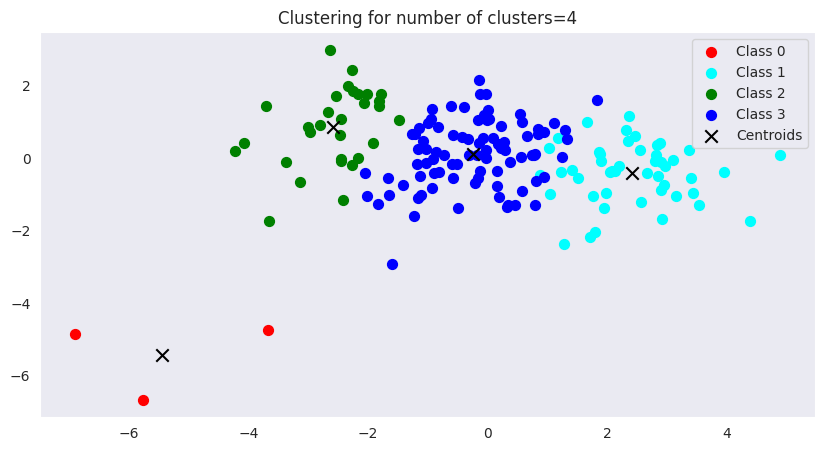

In [432]:
#Plotting the clusters in 2d
plt.figure(figsize=(10,5))
plt.scatter(data_pca.iloc[y_kmeans == 0, 0], data_pca.iloc[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Class 0')
plt.scatter(data_pca.iloc[y_kmeans == 1, 0], data_pca.iloc[y_kmeans == 1, 1], s = 50, c = 'cyan', label = 'Class 1')
plt.scatter(data_pca.iloc[y_kmeans == 2, 0], data_pca.iloc[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Class 2')
plt.scatter(data_pca.iloc[y_kmeans == 3, 0], data_pca.iloc[y_kmeans == 3, 1], s = 50, c = 'blue', label = 'Class 3')

#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroids', marker='x')
plt.title('Clustering for number of clusters=4')
plt.legend()

In [433]:
# Create the 3D scatter plot
fig = px.scatter_3d(data_pca, x=0, y=1, z=2, color=kmeans.labels_)
fig.show()

In [434]:
#Added kemans predicted class to data_pca
data_pca['Class'] = kmeans.labels_


In [435]:
#Added kemans predicted class to dataset
dataset['Class'] = kmeans.labels_

In [436]:
#Function to plot feature and our predicted class labels
def plot(data,X,Y):
  sns.barplot(x = X, y = Y, data  = data)
  plt.title(Y + ' vs ' + X)
  plt.show()

Plotting the each feature with respect to aur predicted kmeans class labels

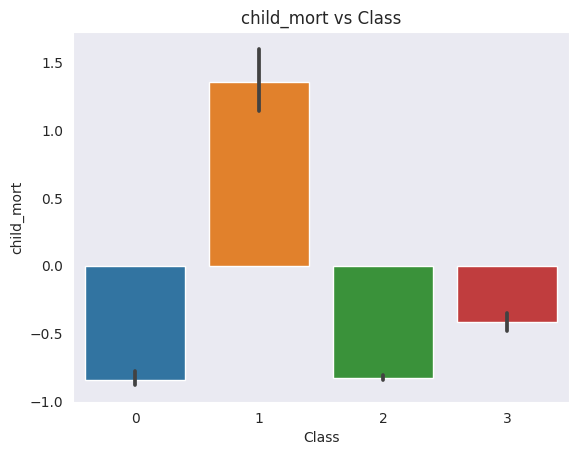

In [437]:
plot(dataset,'Class','child_mort')

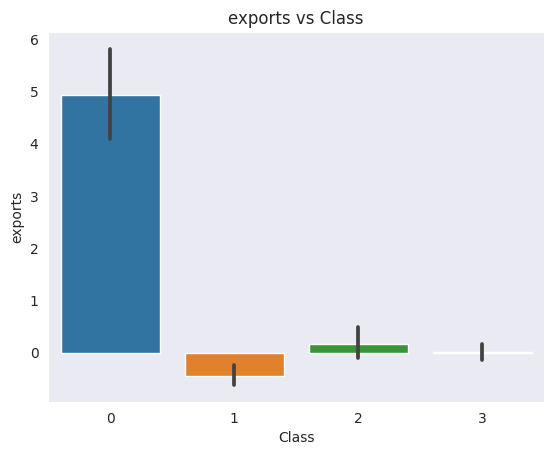

In [438]:
plot(dataset,'Class','exports')

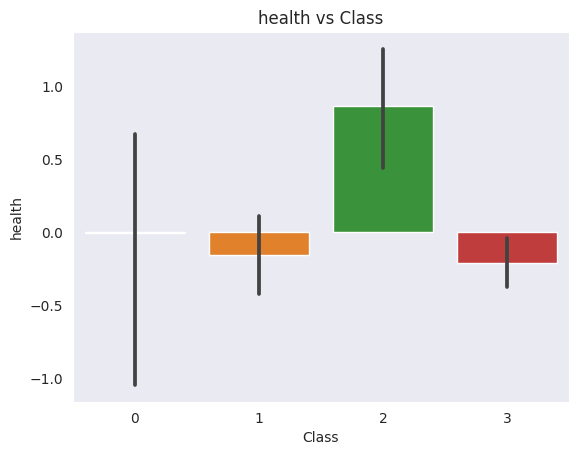

In [439]:
plot(dataset,'Class','health')

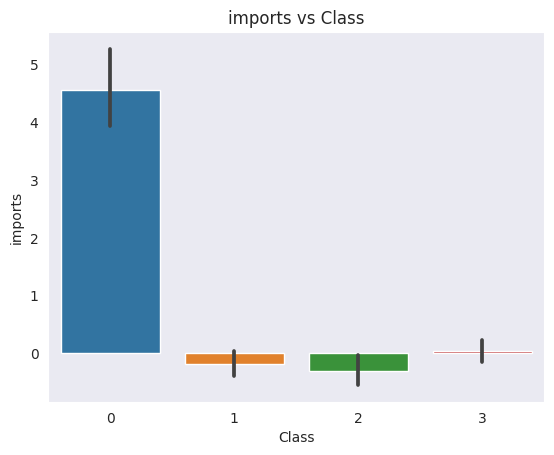

In [440]:
plot(dataset,'Class','imports')

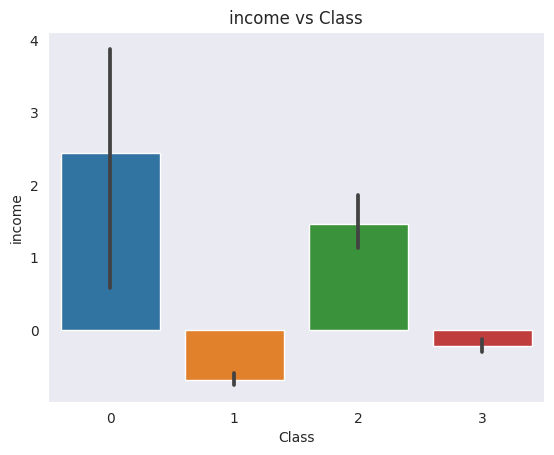

In [441]:
plot(dataset,'Class','income')

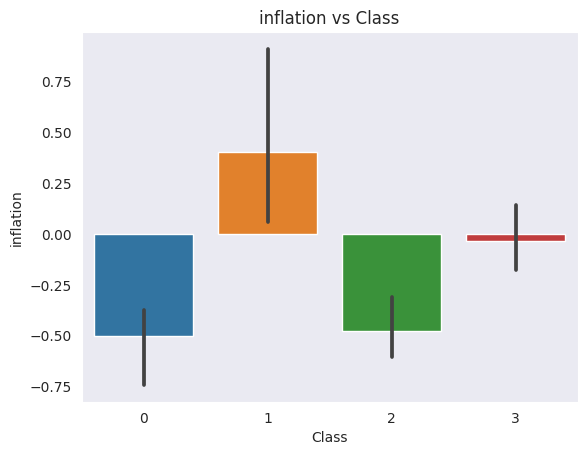

In [442]:
plot(dataset,'Class','inflation')

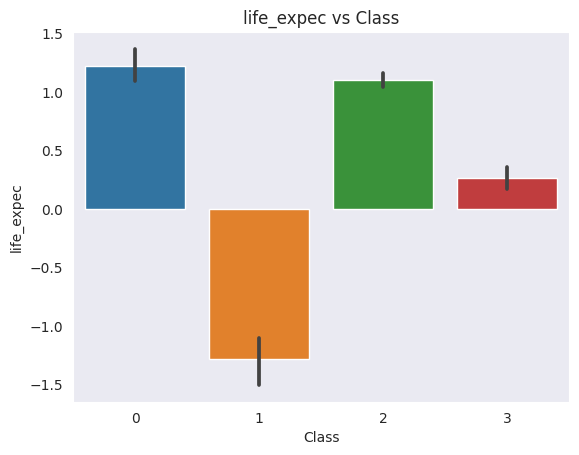

In [443]:
plot(dataset,'Class','life_expec')

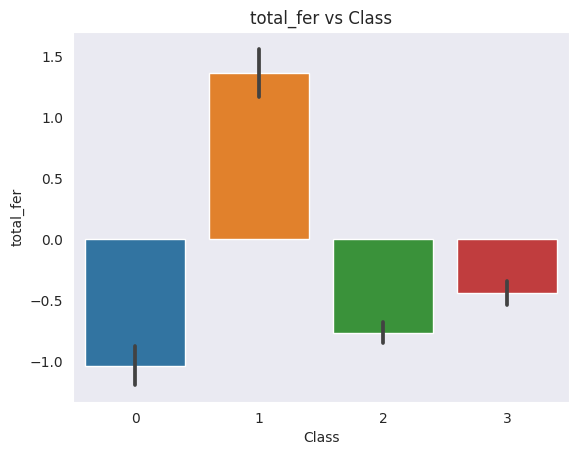

In [444]:
plot(dataset,'Class','total_fer')

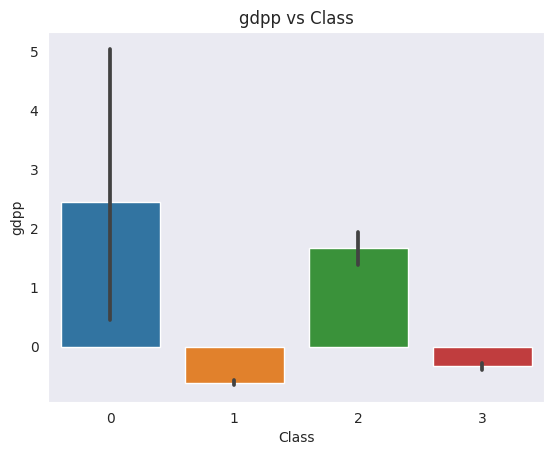

In [445]:
plot(dataset,'Class','gdpp')

* Class 0 - High
* Class 1 - Low
* Class 2-Upper-MIDDLE
* Class 3- LOWER-MIDDLE

In [446]:
print(data_pca)

            0         1         2         3         4         5  Class
0    2.904290 -0.095334  0.715965 -1.002240 -0.157835  0.253834      1
1   -0.428622  0.586392  0.332486  1.157577  0.174154 -0.084325      3
2    0.284370  0.453810 -1.217842  0.865511  0.156005  0.400491      3
3    2.923630 -1.690471 -1.520471 -0.837107 -0.272390  0.546353      1
4   -1.030477 -0.136249  0.225044  0.844523 -0.192428  0.206298      3
..        ...       ...       ...       ...       ...       ...    ...
162  0.818170 -0.637652  0.388754  0.704477 -0.394561 -0.009032      3
163  0.549383  1.230186 -3.092051  0.114965  2.076336 -0.096982      3
164 -0.497030 -1.386574  0.237811  1.070877  1.172554 -0.051452      3
165  1.881792  0.109125 -1.106424 -0.056088  0.616511  0.539295      1
166  2.855476 -0.484541 -0.222497 -0.813916 -0.273246 -0.200774      1

[167 rows x 7 columns]


In [447]:
#Plotting choropleth
data_pca.insert(0,column = 'Country', value = dataset['country'])
data_pca['Class'].loc[data_pca['Class'] == 0] = 'High'
data_pca['Class'].loc[data_pca['Class'] == 1] = 'Low'
data_pca['Class'].loc[data_pca['Class'] == 2] = 'Upper-middle'
data_pca['Class'].loc[data_pca['Class'] == 3] = 'Lower-middle'

fig = px.choropleth(data_pca[['Country','Class']],locationmode = 'country names',locations = 'Country',title = 'Overall development of the country',color = data_pca['Class'])
fig.show()

# DBSCAN

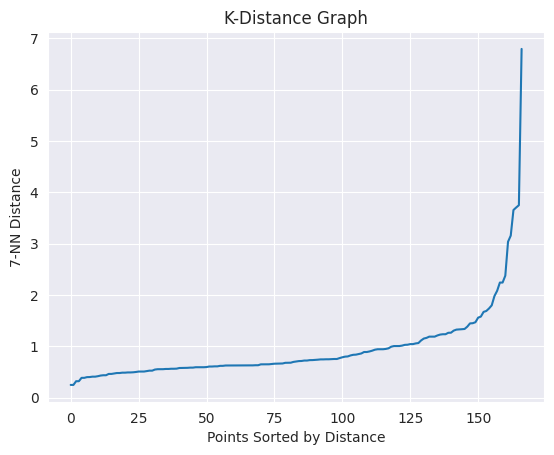

In [342]:
#K-Distance Graph
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(data_pca.drop(['Class','Country'], axis  = 1))
distances, indices = knn.kneighbors(data_pca.drop(['Class','Country'], axis  = 1))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

In [343]:
#Apply DBSCAN 
db = DBSCAN(eps = 1.3, min_samples = 12).fit(data_pca.drop(['Class','Country'], axis  = 1))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in db.labels_

n_clusters_ = len(set(db.labels_))
print('Number of Clusters : ', n_clusters_)

data_pca['Class'] = db.labels_; data_pca['Class'] = db.labels_

Number of Clusters :  4


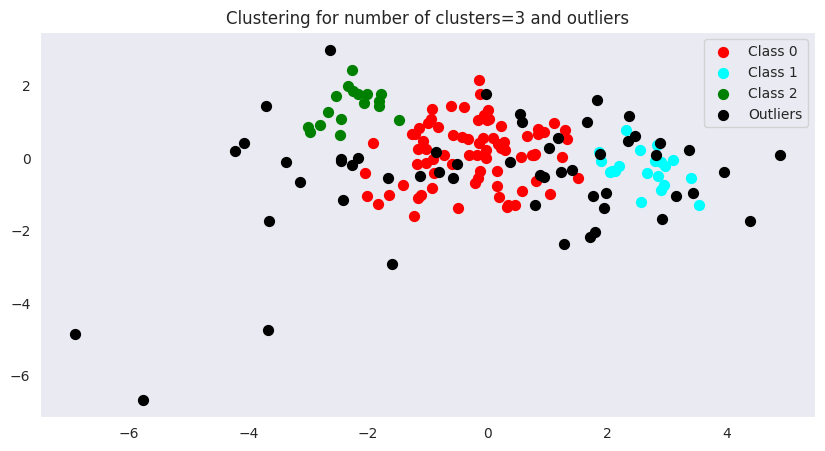

In [344]:
#Plotting the clusters and outliers in 2d
plt.figure(figsize=(10,5))
data = data_pca.drop('Country',axis =1)
plt.scatter(data.iloc[db.labels_ == 0, 0], data.iloc[db.labels_ == 0, 1], s = 50, c = 'red', label = 'Class 0')
plt.scatter(data.iloc[db.labels_ == 1, 0], data.iloc[db.labels_ == 1, 1], s = 50, c = 'cyan', label = 'Class 1')
plt.scatter(data.iloc[db.labels_ == 2, 0], data.iloc[db.labels_ == 2, 1], s = 50, c = 'green', label = 'Class 2')
plt.scatter(data.iloc[db.labels_ == -1, 0], data.iloc[db.labels_ == -1, 1], s = 50, c = 'black', label = 'Outliers')

plt.title('Clustering for number of clusters=3 and outliers')
plt.legend()

In [345]:
# Create the 3D scatter plot
fig = px.scatter_3d(data_pca, x=0, y=1, z=2, color=db.labels_)
fig.show()

In [346]:
#Added DBSCAN predicted class to data_pca
data_pca['class'] = db.labels_

In [347]:
#Added DBSCAN predicted class to dataset
dataset['class'] = db.labels_

Plotting the each feature with respect to aur predicted DBSCAN class labels

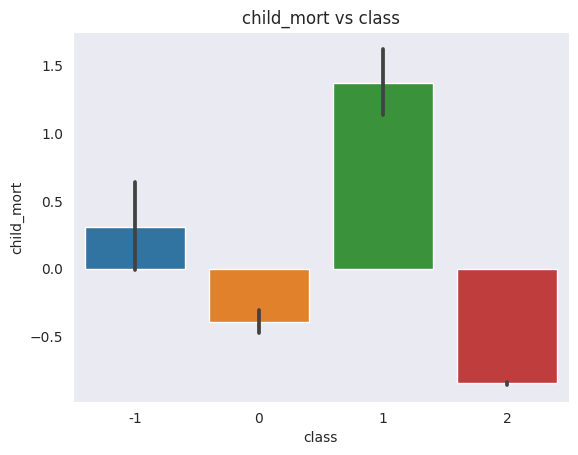

In [348]:
plot(dataset,'class','child_mort')

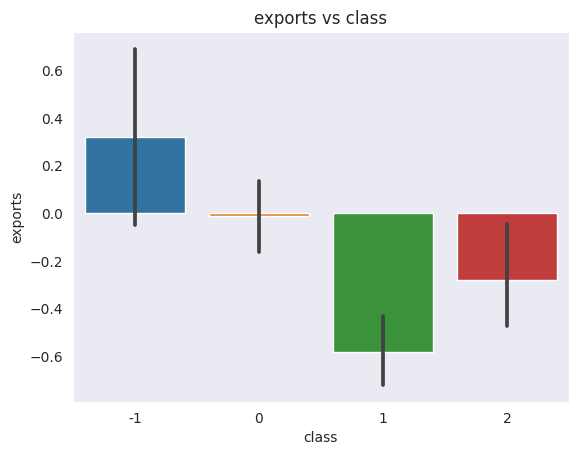

In [349]:
plot(dataset,'class','exports')

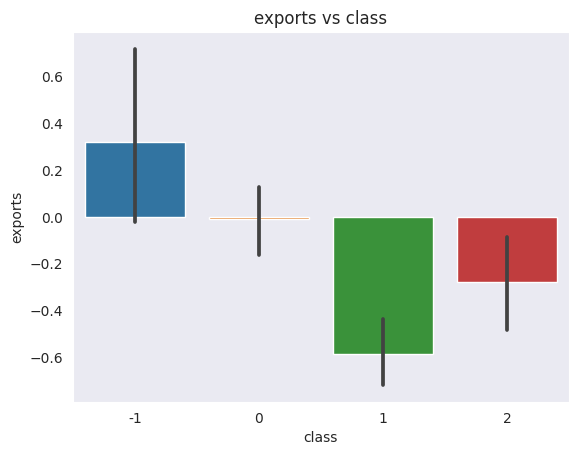

In [350]:
plot(dataset,'class','exports')

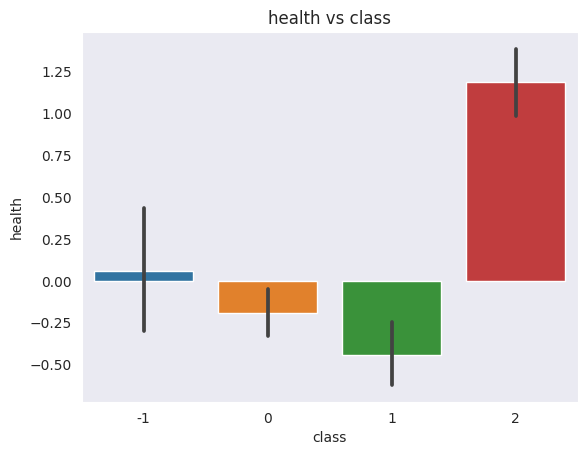

In [351]:
plot(dataset,'class','health')

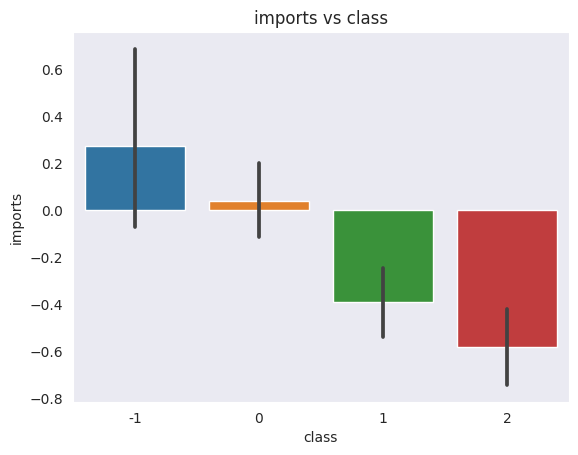

In [352]:
plot(dataset,'class','imports')

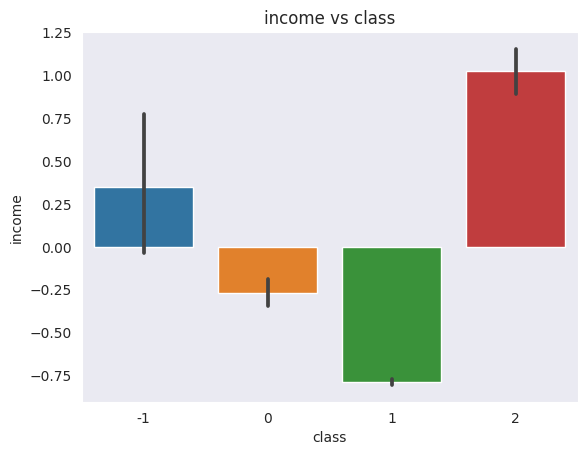

In [353]:
plot(dataset,'class','income')

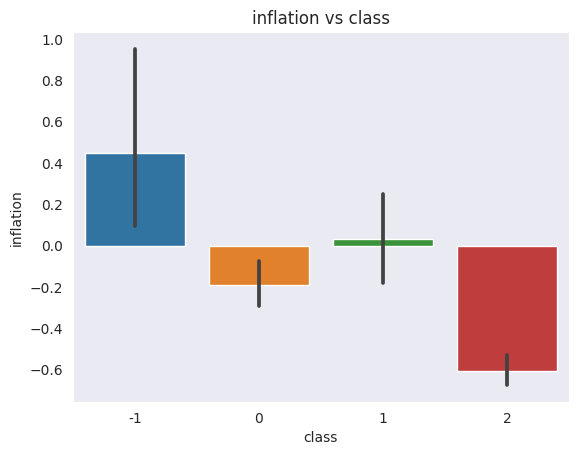

In [354]:
plot(dataset,'class','inflation')

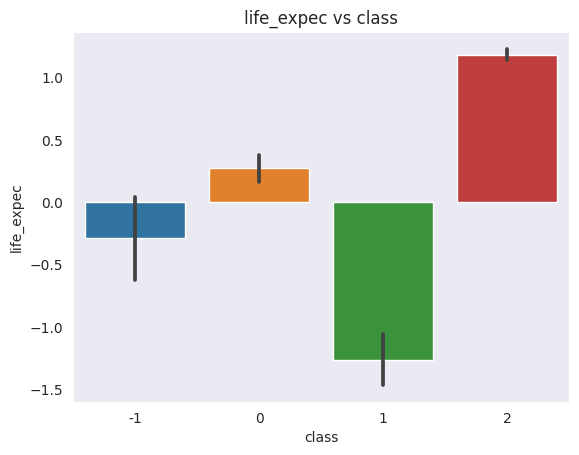

In [355]:
plot(dataset,'class','life_expec')

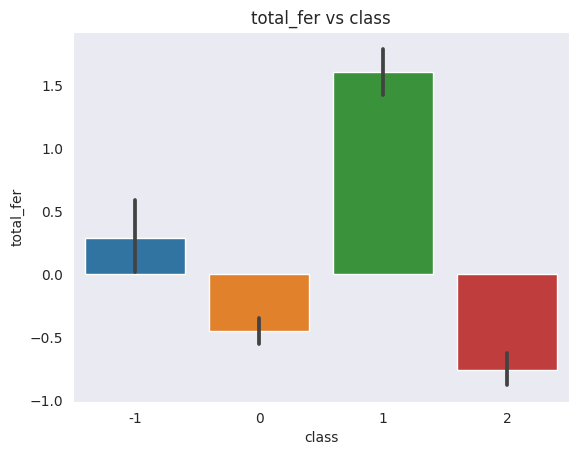

In [356]:
plot(dataset,'class','total_fer')

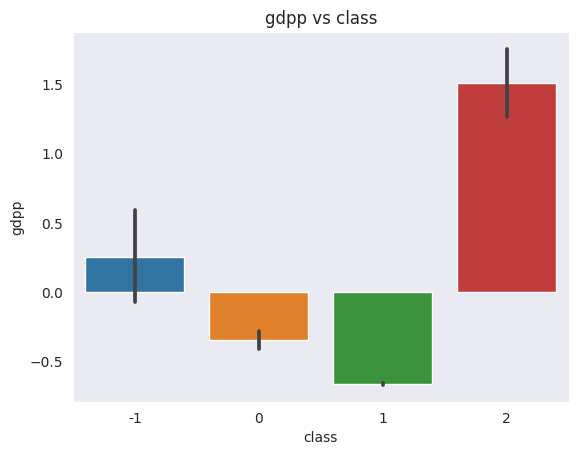

In [357]:
plot(dataset,'class','gdpp')



*  Class 0:Middle
*  Class 1:Low
*  Class 2:High
*  Class -1: Outliers



In [358]:
#Plotting choropleth
data_pca['class'].loc[data_pca['class'] == 0] = 'Middle'
data_pca['class'].loc[data_pca['class'] == 1] = 'Low'
data_pca['class'].loc[data_pca['class'] == 2] = 'High'
data_pca['class'].loc[data_pca['class'] == -1] = 'Outlier'

fig = px.choropleth(data_pca[['Country','class']],locationmode = 'country names',locations = 'Country',title = 'Overall development of the country',color = data_pca['class'])
fig.show()

# Hierarchical

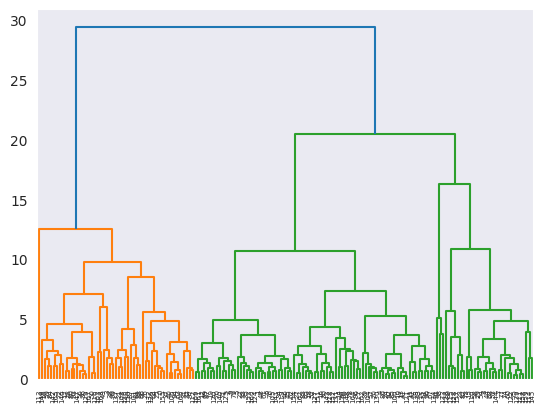

In [359]:
#plotted dendrogram
linkage_data = linkage(data_pca.drop(['class','Country','Class'],axis = 1), method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.show()

In [360]:
#Applied Agglomerative clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(data_pca.drop(['class','Country','Class'],axis = 1))

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; data_pca['Class'] = pred_agc

In [361]:
# Created 3D scatter plot
fig = px.scatter_3d(data_pca, x=0, y=1, z=2, color=hierarchical_cluster.labels_)
fig.show()

In [362]:
data_pca['clas'] = hierarchical_cluster.labels_

In [363]:
dataset['clas'] = hierarchical_cluster.labels_

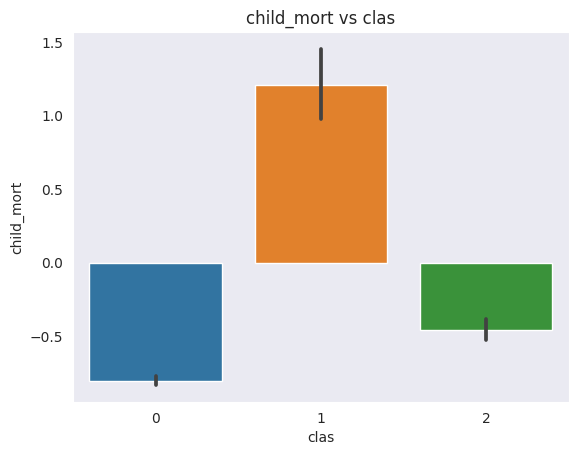

In [364]:
plot(dataset,'clas','child_mort')

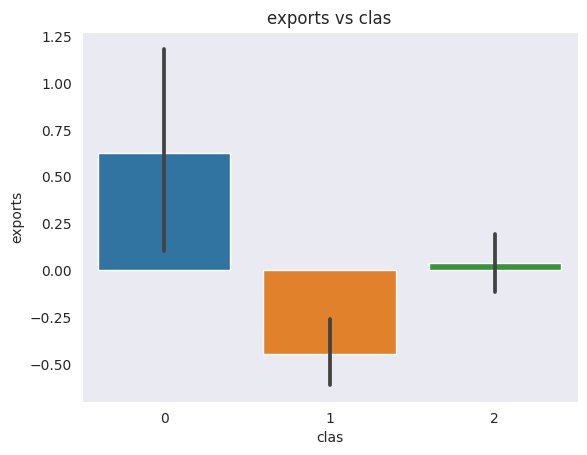

In [365]:
plot(dataset,'clas','exports')

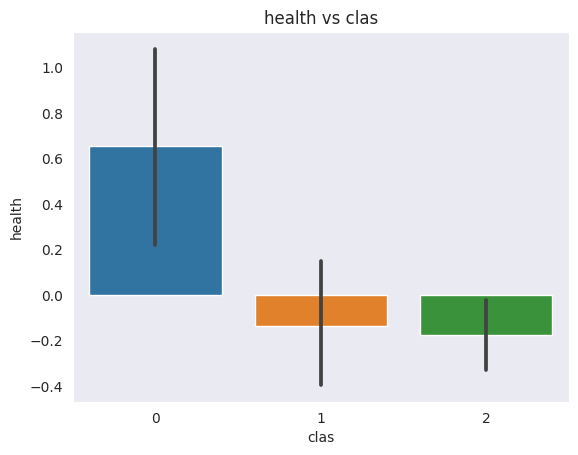

In [366]:
plot(dataset,'clas','health')

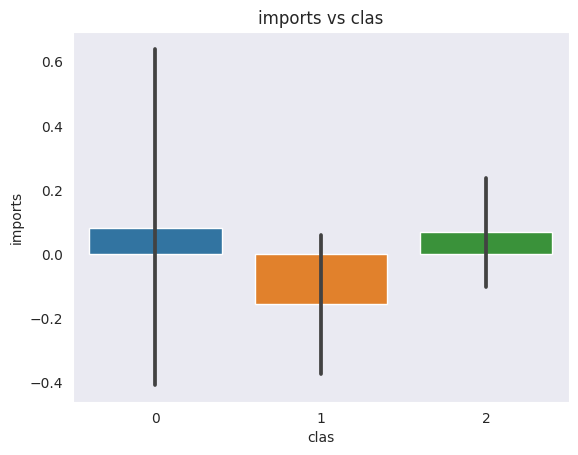

In [367]:
plot(dataset,'clas','imports')

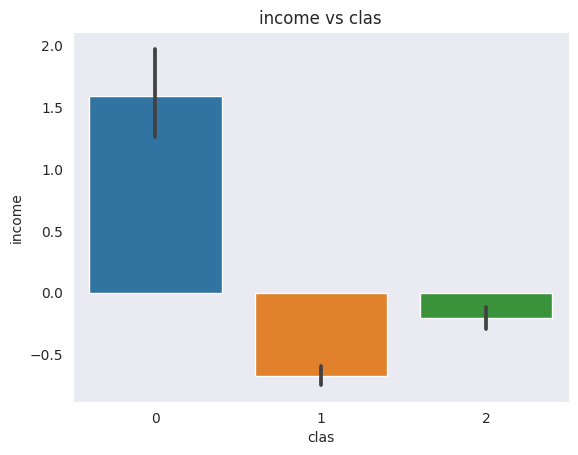

In [368]:
plot(dataset,'clas','income')

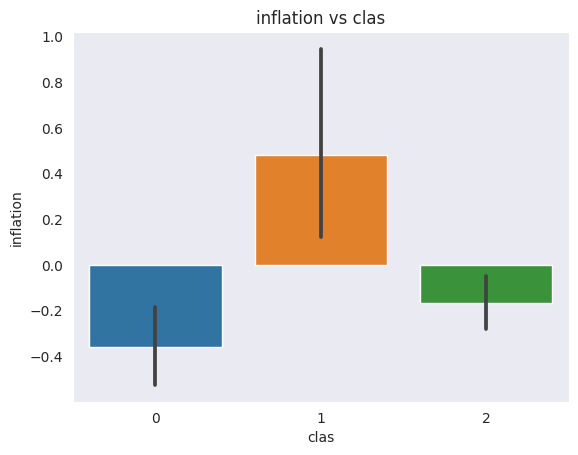

In [369]:
plot(dataset,'clas','inflation')

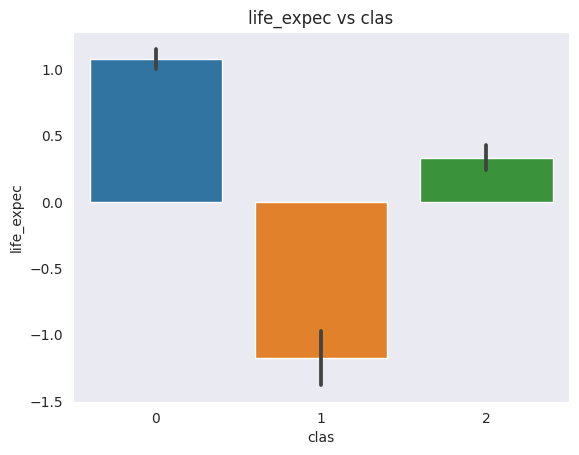

In [370]:
plot(dataset,'clas','life_expec')

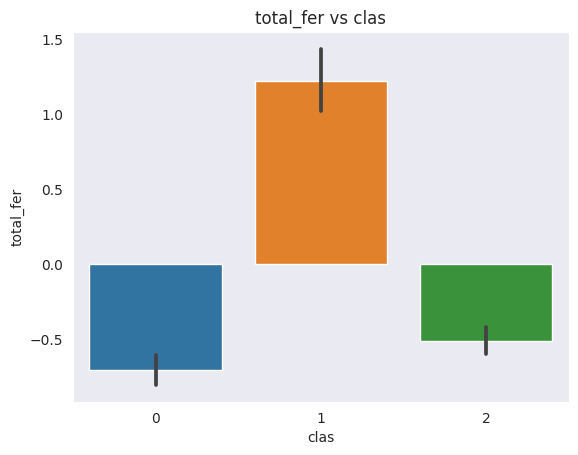

In [371]:
plot(dataset,'clas','total_fer')

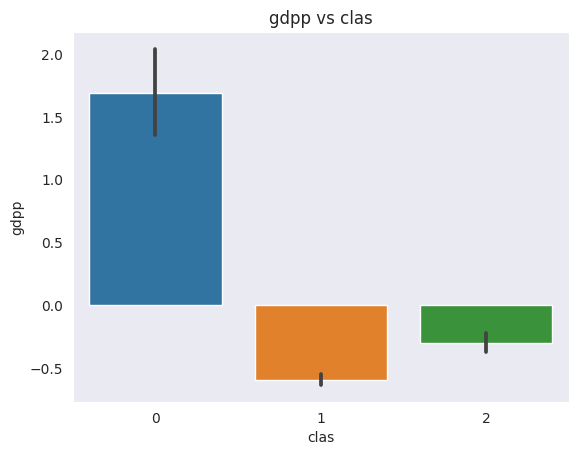

In [372]:
plot(dataset,'clas','gdpp')

In [373]:
#plotted chloropleth graph
data_pca['clas'].loc[data_pca['clas'] == 0] = 'High'
data_pca['clas'].loc[data_pca['clas'] == 1] = 'Low'
data_pca['clas'].loc[data_pca['clas'] == 2] = 'Middle'
fig = px.choropleth(data_pca[['Country','clas']],locationmode = 'country names',locations = 'Country',title = 'Overall development of the country',color = data_pca['clas'])
fig.show()

# Mean Shift Clustering

In [374]:
#dataset
data = dataset[continuous_data]

#applied mean shift
bandwidth = estimate_bandwidth(data_pca.drop(['class','Country','Class','clas'],axis = 1), quantile=0.2)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(data_pca.drop(['class','Country','Class','clas'],axis = 1))

cluster_centers = ms.cluster_centers_
labels = ms.labels_

silhouette_score(data_pca.drop(['class','Country','Class','clas'],axis = 1), labels)

# plt.show()
fig = px.scatter_3d(data_pca.drop(['class','Country','Class','clas'],axis = 1), x=0, y=1, z=2, color=labels)
fig.show()

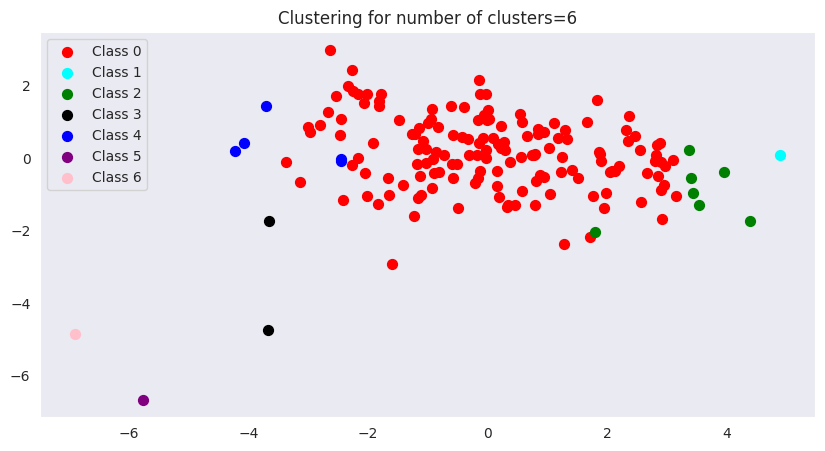

In [375]:
#plot clusters in 2D

plt.figure(figsize=(10,5))
data = data_pca.drop('Country',axis =1)
plt.scatter(data.iloc[labels == 0, 0], data.iloc[labels == 0, 1], s = 50, c = 'red', label = 'Class 0')
plt.scatter(data.iloc[labels == 1, 0], data.iloc[labels == 1, 1], s = 50, c = 'cyan', label = 'Class 1')
plt.scatter(data.iloc[labels == 2, 0], data.iloc[labels == 2, 1], s = 50, c = 'green', label = 'Class 2')
plt.scatter(data.iloc[labels == 3, 0], data.iloc[labels == 3, 1], s = 50, c = 'black', label = 'Class 3')
plt.scatter(data.iloc[labels == 4, 0], data.iloc[labels == 4, 1], s = 50, c = 'blue', label = 'Class 4')
plt.scatter(data.iloc[labels == 5, 0], data.iloc[labels == 5, 1], s = 50, c = 'purple', label = 'Class 5')
plt.scatter(data.iloc[labels == 6, 0], data.iloc[labels == 6, 1], s = 50, c = 'pink', label = 'Class 6')

plt.title('Clustering for number of clusters=6')
plt.legend()

Plotting the each feature with respect to our predicted spectral class labels

In [376]:
data_pca['Clas'] = labels

In [377]:
dataset['Clas'] = labels

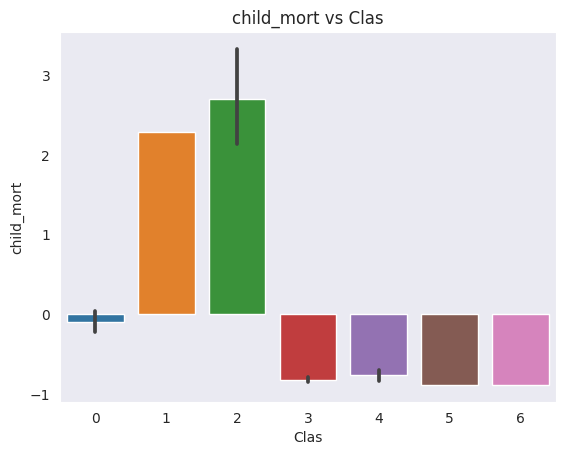

In [378]:
plot(dataset,'Clas','child_mort')

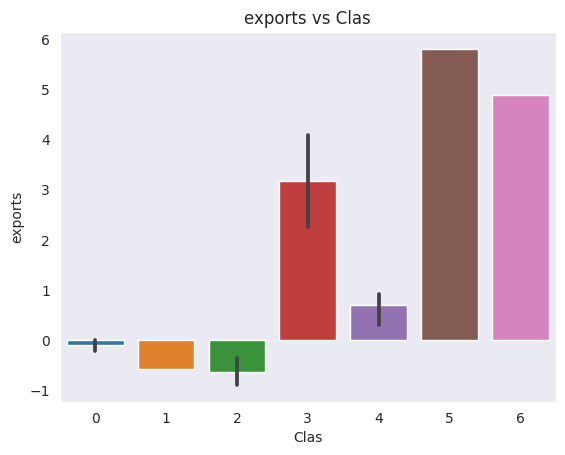

In [379]:
plot(dataset,'Clas','exports')

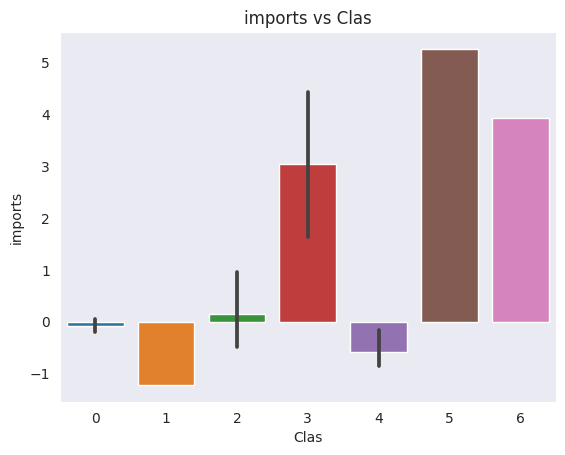

In [380]:
plot(dataset,'Clas','imports')

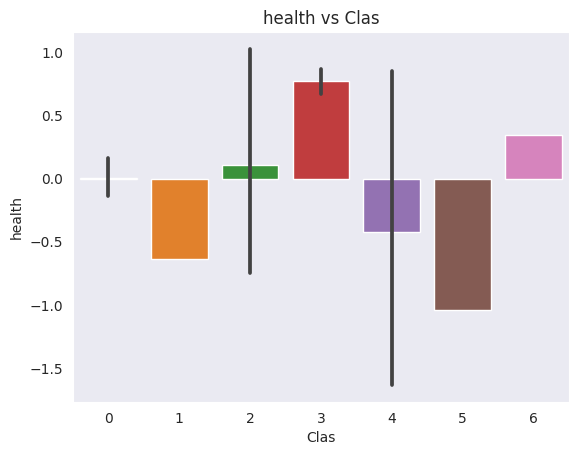

In [381]:
plot(dataset,'Clas','health')

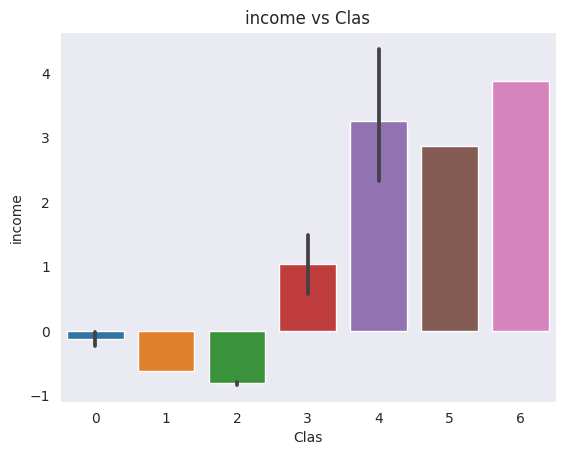

In [382]:
plot(dataset,'Clas','income')

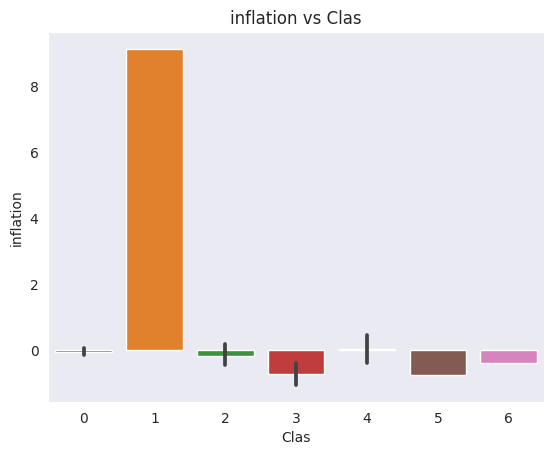

In [383]:
plot(dataset,'Clas','inflation')

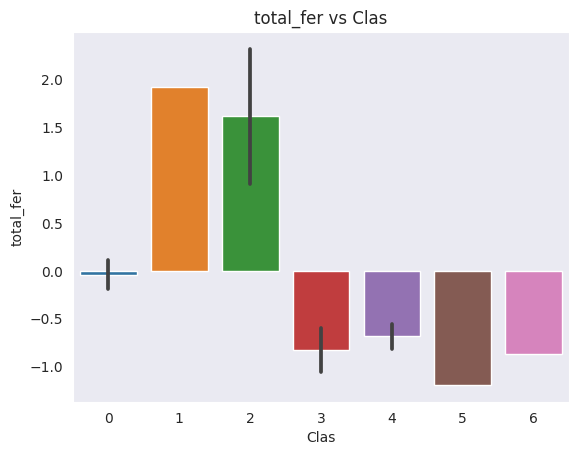

In [384]:
plot(dataset,'Clas','total_fer')

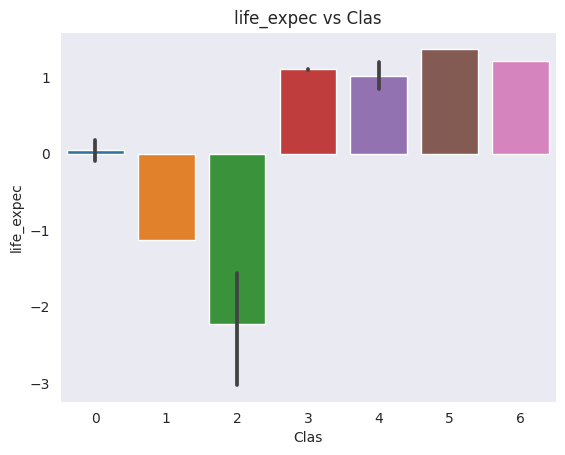

In [385]:
plot(dataset,'Clas','life_expec')

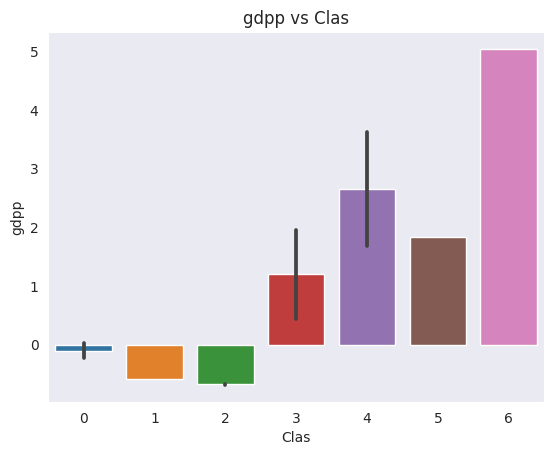

In [386]:
plot(dataset,'Clas','gdpp')

In [387]:
#plot choropleth graph

data_pca['Clas'].loc[data_pca['Clas'] == 0] = 'CLASS 0'
data_pca['Clas'].loc[data_pca['Clas'] == 1] = 'CLASS 1'
data_pca['Clas'].loc[data_pca['Clas'] == 2] = 'CLASS 2'
data_pca['Clas'].loc[data_pca['Clas'] == 3] = 'CLASS 3'
data_pca['Clas'].loc[data_pca['Clas'] == 4] = 'CLASS 4'
data_pca['Clas'].loc[data_pca['Clas'] == 5] = 'CLASS 5'
data_pca['Clas'].loc[data_pca['Clas'] == 6] = 'CLASS 6'
fig = px.choropleth(data_pca[['Country','Clas']],locationmode = 'country names',locations = 'Country',title = 'Overall development of the country',color = data_pca['Clas'])
fig.show()

# Spectral Clustering

In [388]:
#Dataset
X = data_pca.drop(['class','Country','Class','clas','Clas'],axis = 1)

# Apply spectral clustering
n_clusters = 4
clustering = SpectralClustering(n_clusters=n_clusters, assign_labels='kmeans', random_state=42)
labels = clustering.fit_predict(X)

# plt.show()
fig = px.scatter_3d(X, x=0, y=1, z=2, color=labels)
fig.show()

In [389]:
#Added spectral predicted class to data_pca
data_pca['Cla'] = labels

In [390]:
#Added spectral predicted class to dataset
dataset['Cla'] = labels

Plotting the each feature with respect to our predicted spectral class labels

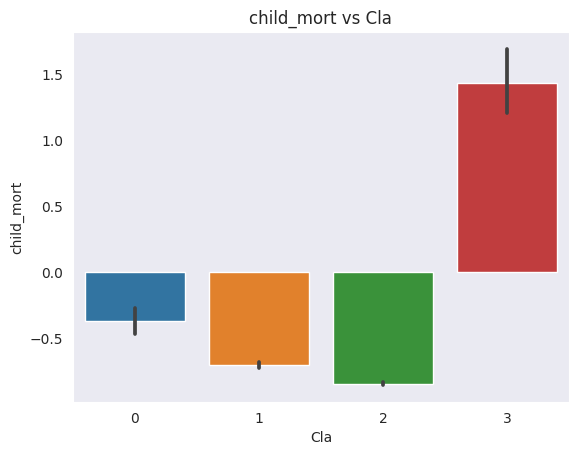

In [391]:
plot(dataset,'Cla','child_mort')

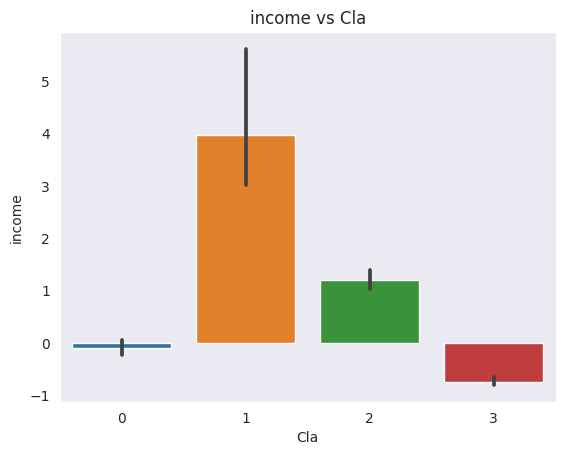

In [392]:
plot(dataset,'Cla','income')

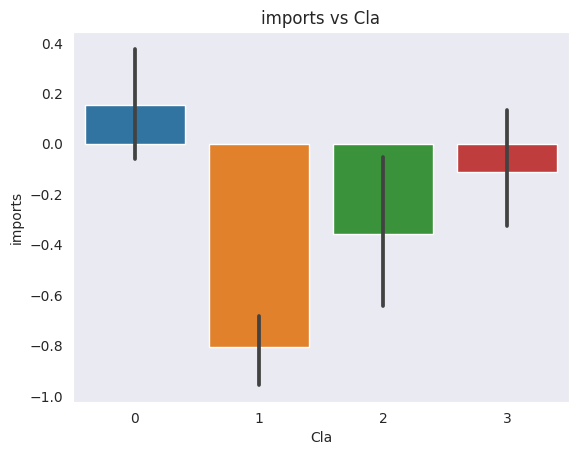

In [393]:
plot(dataset,'Cla','imports')

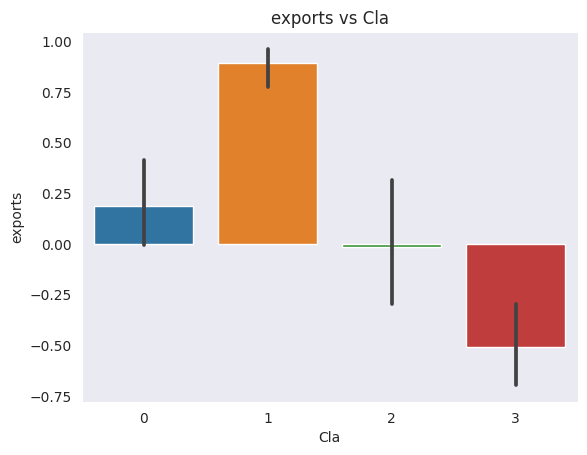

In [394]:
plot(dataset,'Cla','exports')

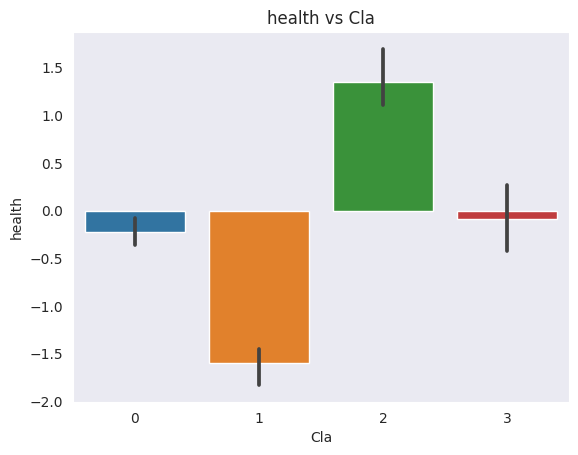

In [395]:
plot(dataset,'Cla','health')

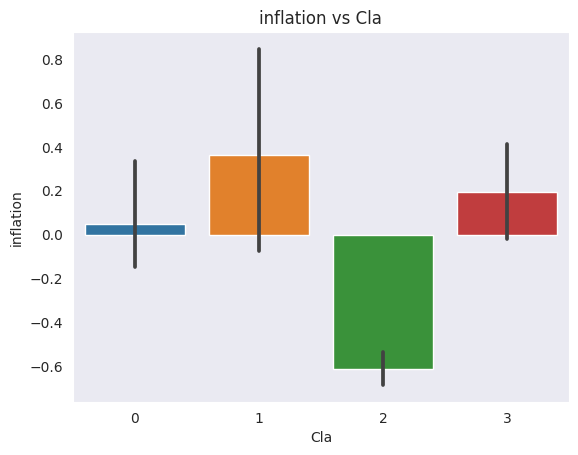

In [396]:
plot(dataset,'Cla','inflation')

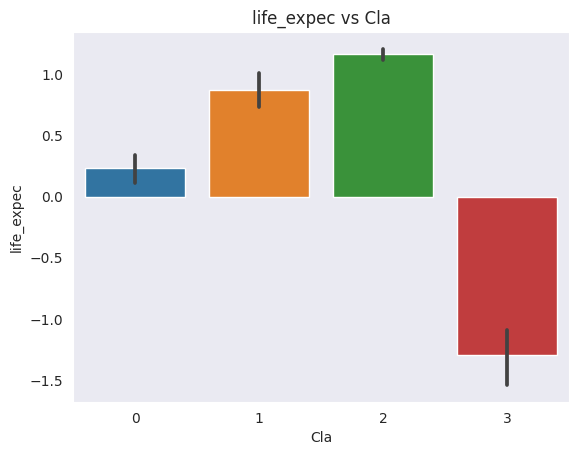

In [397]:
plot(dataset,'Cla','life_expec')

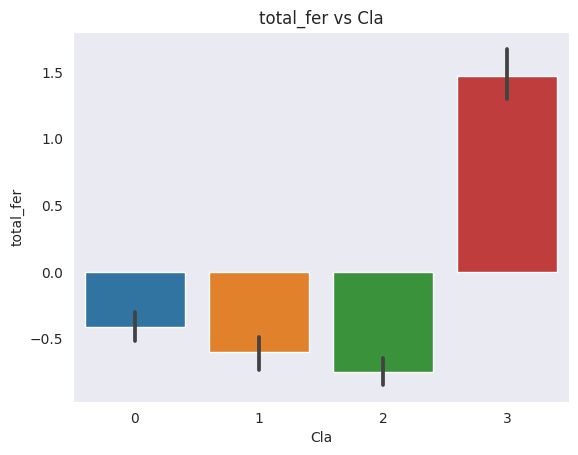

In [398]:
plot(dataset,'Cla','total_fer')

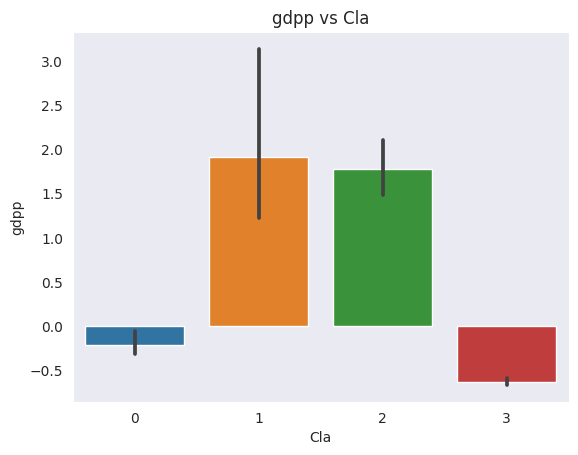

In [399]:
plot(dataset,'Cla','gdpp')



*   Class 0: Lower Middle
*   Class 1: High
*   Class 2: Upper Middle
*   Class 3: Low



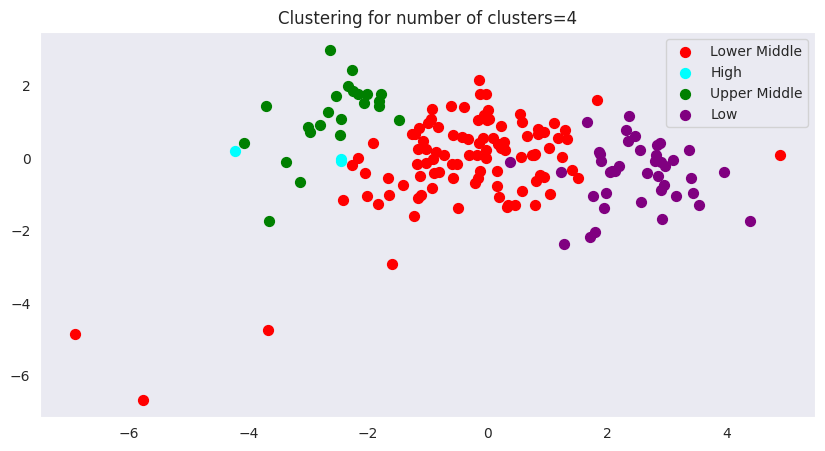

In [400]:
#Plot the clusters in 2d
plt.figure(figsize=(10,5))
data = data_pca.drop('Country',axis =1)
plt.scatter(data.iloc[labels == 0, 0], data.iloc[labels == 0, 1], s = 50, c = 'red', label = 'Lower Middle')
plt.scatter(data.iloc[labels == 1, 0], data.iloc[labels == 1, 1], s = 50, c = 'cyan', label = 'High')
plt.scatter(data.iloc[labels == 2, 0], data.iloc[labels == 2, 1], s = 50, c = 'green', label = 'Upper Middle')
plt.scatter(data.iloc[labels == 3, 0], data.iloc[labels == 3, 1], s = 50, c = 'purple', label = 'Low')
plt.title('Clustering for number of clusters=4')
plt.legend()

In [401]:
#Plot choropleth
data_pca['Cla'].loc[data_pca['Cla'] == 0] = 'Lower Middle'
data_pca['Cla'].loc[data_pca['Cla'] == 1] = 'High'
data_pca['Cla'].loc[data_pca['Cla'] == 2] = 'Upper Middle'
data_pca['Cla'].loc[data_pca['Cla'] == 3] = 'Low'
fig = px.choropleth(data_pca[['Country','Cla']],locationmode = 'country names',locations = 'Country',title = 'Overall development of the country',color = data_pca['Cla'])
fig.show()

# Gaussian Mixture

In [402]:
# Apply Gaussian Mixture Model with 4 clusters
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)

# Print the cluster labels for each country
labels = gmm.predict(X)
print("Cluster Labels:\n", labels)

Cluster Labels:
 [1 0 2 1 0 2 0 3 3 2 2 2 2 0 0 3 2 1 2 2 0 1 2 3 0 1 1 2 1 3 2 1 1 2 0 2 1
 1 1 2 1 0 3 0 3 2 2 2 2 1 1 0 2 3 3 1 1 0 3 1 3 2 2 1 1 2 1 0 3 2 2 2 1 3
 2 3 2 3 2 2 1 1 3 2 1 0 0 1 1 2 0 3 0 1 1 0 0 1 0 1 0 1 0 1 0 2 1 2 1 2 3
 3 1 1 3 2 1 2 2 2 2 0 3 3 0 2 1 1 2 1 0 0 1 0 0 3 1 1 3 3 1 2 1 2 3 3 2 1
 0 1 1 2 0 2 2 1 0 3 3 3 2 2 2 1 0 1 1]


In [403]:
#Plot clusters in 3d
fig = px.scatter_3d(X, x=0, y=1, z=2, color=labels)
fig.show()

In [404]:
#Added gaussian mixture predicted class to data_pca
data_pca['claSS'] = labels

In [405]:
#Added gaussian mixture predicted class to dataset
dataset['claSS'] = labels

Plotting the each feature with respect to aur predicted gaussian mixture class labels

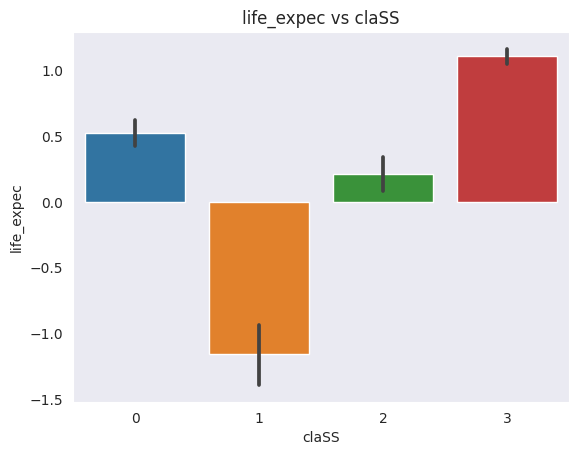

In [406]:
plot(dataset,'claSS','life_expec')

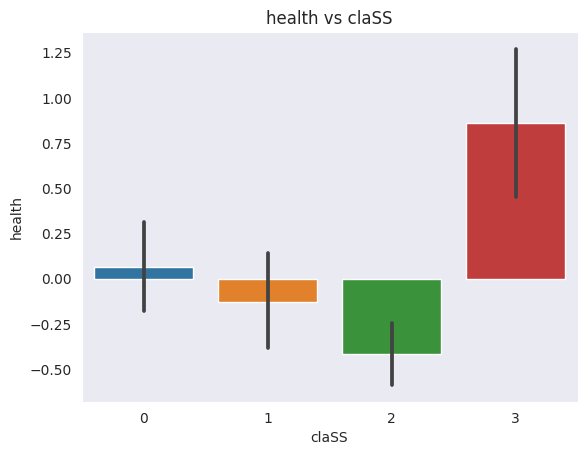

In [407]:
plot(dataset,'claSS','health')

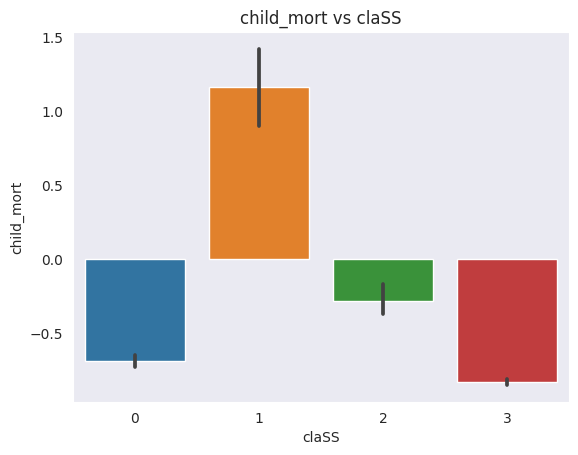

In [408]:
plot(dataset,'claSS','child_mort')

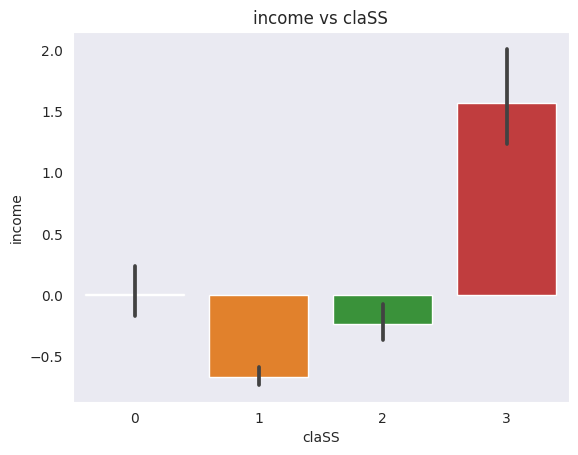

In [409]:
plot(dataset,'claSS','income')

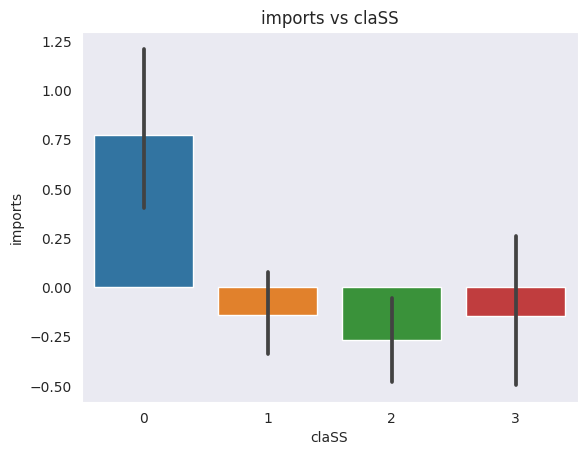

In [410]:
plot(dataset,'claSS','imports')

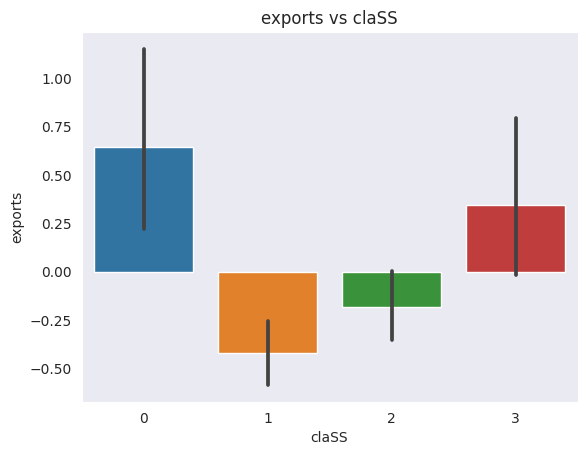

In [411]:
plot(dataset,'claSS','exports')

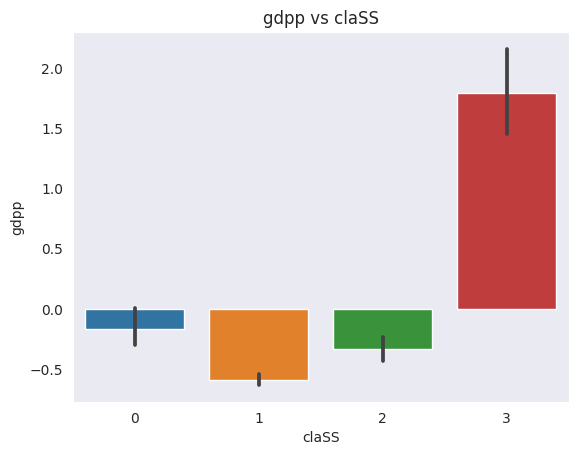

In [412]:
plot(dataset,'claSS','gdpp')

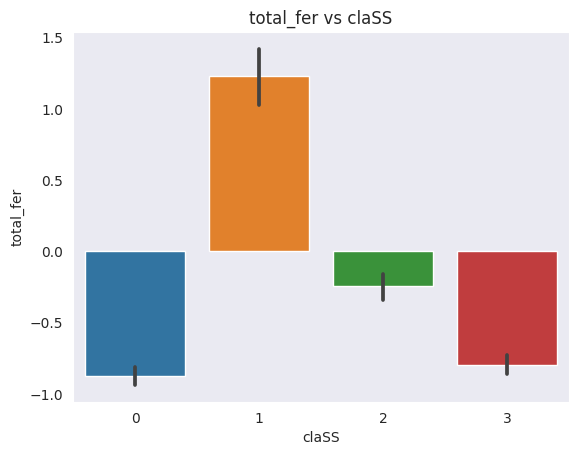

In [413]:
plot(dataset,'claSS','total_fer')

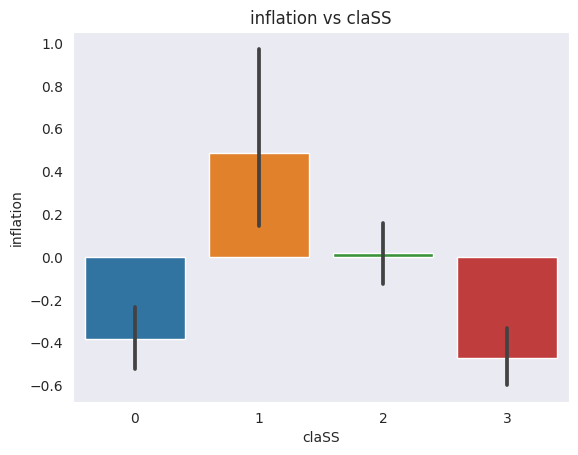

In [414]:
plot(dataset,'claSS','inflation')

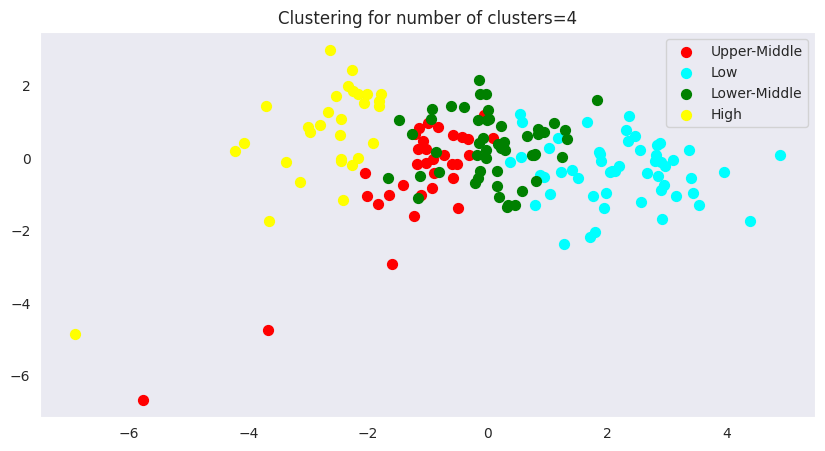

In [415]:
#Plot the clusters in 2d
plt.figure(figsize=(10,5))
data = data_pca.drop('Country',axis =1)
plt.scatter(data.iloc[labels == 0, 0], data.iloc[labels == 0, 1], s = 50, c = 'red', label = 'Upper-Middle')
plt.scatter(data.iloc[labels == 1, 0], data.iloc[labels == 1, 1], s = 50, c = 'cyan', label = 'Low')
plt.scatter(data.iloc[labels == 2, 0], data.iloc[labels == 2, 1], s = 50, c = 'green', label = 'Lower-Middle')
plt.scatter(data.iloc[labels == 3, 0], data.iloc[labels == 3, 1], s = 50, c = 'yellow', label = 'High')
plt.title('Clustering for number of clusters=4')
plt.legend()

In [416]:
#Plot choropleth
data_pca['claSS'].loc[data_pca['claSS'] == 0] = 'Upper-Middle'
data_pca['claSS'].loc[data_pca['claSS'] == 1] = 'Low'
data_pca['claSS'].loc[data_pca['claSS'] == 2] = 'Lower-Middle'
data_pca['claSS'].loc[data_pca['claSS'] == 3] = 'High'
fig = px.choropleth(data_pca[['Country','claSS']],locationmode = 'country names',locations = 'Country',title = 'Overall development of the country',color = data_pca['claSS'])
fig.show()